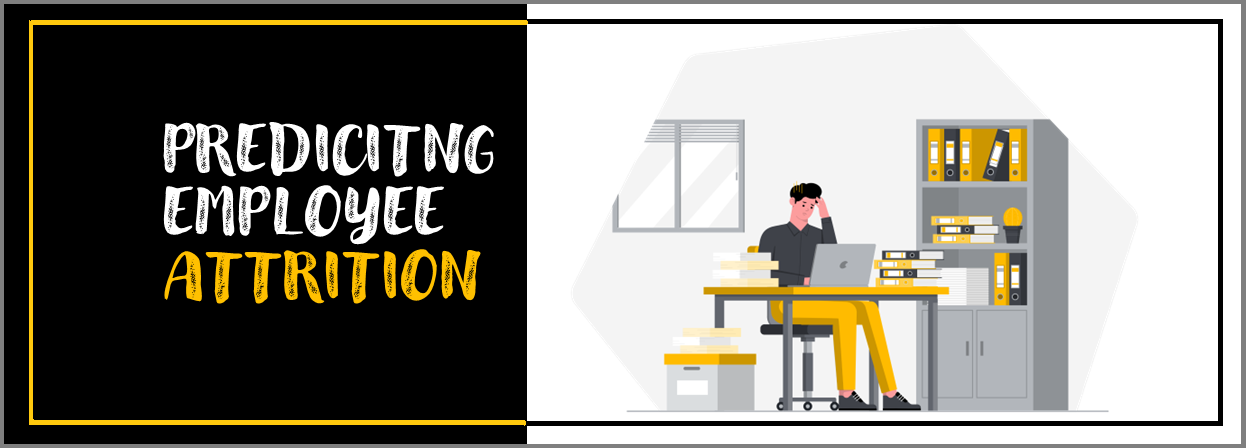

<h1 id="basics" style="background:black; padding: 10px 0; border:#FFC300; border-width:5px; border-radius: 10px; border-style:solid; font-family:MV Boli; color:white; line-height: 10px;"> 
    <center> ◽ CONTENTS ◽
    </center>
</h1>

#### [**<span style="color:black">1. Importing the Libraries</span>**](#one)
    
#### [**<span style="color:black">2. Loading the Dataset</span>**](#two)

#### [**<span style="color:black">3. Problem statement</span>**](#three)

#### [**<span style="color:black">4. Exploratory Data Analysis (Phase 1)</span>**](#four)

#### [**<span style="color:black">5. Feature Engineering</span>**](#five)

#### [**<span style="color:black">6. Exploratory Data Analysis (Phase 2)</span>**](#six)

#### [**<span style="color:black">7. Encoding Categorical Features + Train-Test Split</span>**](#seven)

#### [**<span style="color:black">8. Simple Decision Tree Classifier</span>**](#eight)

#### [**<span style="color:black">9. Gradient Boosted Decision Trees using XGBoost</span>**](#nine)

#### [**<span style="color:black">10. Random Forest Classifier</span>**](#ten)

#### [**<span style="color:black">11. Comparison of Models</span>**](#eleven)

#### [**<span style="color:black">12. Insights obtained from EDA</span>**](#twelve)

#### [**<span style="color:black">13. Discussion on Trade Off and Possible Recommendations</span>**](#thirteen)


<a id = "one"></a>
<h1 id="basics" style="background:black; padding: 10px 0; border:#FFC300; border-width:5px; border-radius: 10px; border-style:solid; font-family:MV Boli; color:white; line-height: 10px;"> 
    <center> ◽ IMPORTING LIBRARIES ◽
    </center>
</h1>



In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display
from itertools import cycle

import category_encoders as ce
import datetime as dt
import warnings

from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.model_selection import learning_curve, train_test_split

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')


<a id = "two"></a>
<h1 id="basics" style="background:black; padding: 10px 0; border:#FFC300; border-width:5px; border-radius: 10px; border-style:solid; font-family:MV Boli; color:white; line-height: 10px;"> 
    <center> ◽ LOADING THE DATASET ◽
    </center>
</h1>

In [2]:
df = pd.read_csv('../input/predicting-employee-attrition/train_MpHjUjU.csv')

<a id = "three"></a>
<h1 id="basics" style="background:black; padding: 10px 0; border:#FFC300; border-width:5px; border-radius: 10px; border-style:solid; font-family:MV Boli; color:white; line-height: 10px;"> 
    <center> ◽ PROBLEM STATEMENT ◽
    </center>
</h1>

In recent years, attention has increasingly been paid to human resources (HR), since worker quality and skills represent a growth factor and a real competitive advantage for companies. After proving its mettle in sales and marketing, artificial intelligence is also becoming central to employee-related decisions within HR management. Organizational growth largely depends on staff retention. Losing employees frequently impacts the morale of the organization and hiring new employees is more expensive than retaining existing ones.

We will be looking at the HR Department data of a large insurance company focused on sales team attrition. Insurance sales teams help insurance companies generate new business by contacting potential customers and selling one or more types of insurance. The department generally sees high attrition and thus staffing becomes a crucial aspect.

The data contains the monthly information for a segment of employees for 2016 and 2017 and we shall try to predict whether a current employee will be leaving the organization in the upcoming two quarters (01 Jan 2018 - 01 July 2018) or not, given:

- Demographics of the employee (city, age, gender etc.)
- Tenure information (joining date, Last Date)
- Historical data regarding the performance of the employee (Quarterly rating, Monthly business acquired, designation, salary)

In [3]:
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


<a id = "four"></a>
<h1 id="basics" style="background:black; padding: 10px 0; border:#FFC300; border-width:5px; border-radius: 10px; border-style:solid; font-family:MV Boli; color:white; line-height: 10px;"> 
    <center> ◽ EXPLORATORY DATA ANALYSIS (PHASE 1) ◽
    </center>
</h1>

We will first explore the data and see what how the different features are distributed and how they are related to our prediction objective. We are trying to predict attrition here. 

In [4]:
print(df.columns)
print("No. of columns : ", len(df.columns))

Index(['MMM-YY', 'Emp_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Salary', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Designation', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')
No. of columns :  13


#### **<span style="color:#483D8B;">Observation: </span>**
 - <strong> So we have a total of 13 columns. </strong>

#### 1. Observations on shape of data

In [5]:
df.shape

(19104, 13)

#### **<span style="color:#483D8B;">Observation: </span>**
 - <strong> So there are almost 19K data points and 13 features. </strong>
 - <strong> Of these 13 features, the feature 'LastWorkingDate' can be transformed into a target feature (if last day is present, then the employee has resigned, otherwise is still employed). </strong>



#### 2. Data types of all the attributes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


#### **<span style="color:#483D8B;">Observation: </span>**
 - <strong>'LastWorkingDate' has only 1616 non-null values. </strong>
 

Next we will look at the meanings of the columns and their data types.

<h4 id="basics" style="background:white; padding: 10px 0; border:#FFC300; border-width:5px; border-radius: 10px; border-style:solid; color:black; line-height: 30px;">
    <span style="font-size:150%;color:#483D8B;"><center>Column Profiling</center> </span>
    <UL>
      <LI> Emp_ID : Unique ID for the employee</LI>
      <LI> MMM-YY : Reporting Date (Monthly) (date-time)</LI>
      <LI> Age : Age of the employee (numerical)</LI>
      <LI> Gender : Gender of the employee – Male, Female (categorical)</LI>
      <LI> City : City Code of the employee (categorical)</LI>
      <LI> Education_Level : Education level – Bachelor, Master or College (categorical)</LI>
      <LI> Salary : Monthly average Income of the employee (numerical)</LI>
      <LI> Date Of Joining : Joining date for the employee (date-time)</LI>
      <LI> <span style="color:blue">LastWorkingDate : Last date of working for the employee - Target Feature (date-time, but will be converted to categorical)</span></LI>
      <LI> Joining Designation : Designation of the employee at the time of joining (categorical, ordinal)</LI>
      <LI> Designation : Designation of the employee at the time of reporting (categorical, ordinal)</LI>
      <LI> Total Business Value : The total business value acquired by the employee in a month </LI>
      <LI> Quarterly Rating : Quarterly rating of the employee: 1,2,3,4 (categorical, ordinal - higher is better)</LI>
    </UL>
</h4>

Next we will see if there are any duplicate observations. If there are duplicates, we will drop them.

#### 3. Duplicate observations

In [7]:
df[df.duplicated()]

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating


#### **<span style="color:#483D8B;">Observation: </span>**
 - <strong>So there are no duplicates in our data. </strong>

#### 4. Converting data types of some features.

We will convert the data types of certain features.

In [8]:
#converting categorical features to 'object' type
df['Emp_ID'] = df['Emp_ID'].astype("object")
df['Education_Level'] = df['Education_Level'].astype("object")
df['Gender'] = df['Gender'].astype('object')
df['Joining Designation'] = df['Joining Designation'].astype('object')
df['Designation'] = df['Designation'].astype('object')
df['Quarterly Rating'] = df['Quarterly Rating'].astype('object')

#date-time features
df['MMM-YY'] = pd.to_datetime(df["MMM-YY"]).astype('datetime64[ns]')
df['Dateofjoining'] = pd.to_datetime(df["Dateofjoining"]).astype('datetime64[ns]')
df['LastWorkingDate'] = pd.to_datetime(df["LastWorkingDate"]).astype('datetime64[ns]')

#### 
#### 5. Statistical Summary

In [9]:
#numerical features
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Age,19104.0,34.650283,6.264471e+00,21.0,30.0,34.0,39.0,58.0
Salary,19104.0,65652.025126,3.091452e+04,10747.0,42383.0,60087.0,83969.0,188418.0
Total Business Value,19104.0,571662.074958,1.128312e+06,-6000000.0,0.0,250000.0,699700.0,33747720.0


In [10]:
#categorical features
df.describe(include=['object']).T

,count,unique,top,freq
Emp_ID,19104,2381,2110,24
Gender,19104,2,Male,11103
City,19104,29,C20,1008
Education_Level,19104,3,Bachelor,6864
Joining Designation,19104,5,1,9831
Designation,19104,5,2,6627
Quarterly Rating,19104,4,1,7679


In [11]:
#date-time features
df.describe(exclude = ['object','float64', 'int64'])[0:6].T

,count,unique,top,freq,first,last
MMM-YY,19104,24,2016-01-01,1022,2016-01-01,2017-12-01
Dateofjoining,19104,869,2012-07-23,192,2010-04-01,2017-12-28
LastWorkingDate,1616,493,2017-07-29,70,2015-12-31,2017-12-28


#### 
#### 6. Missing Value Detection

In [12]:
percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
percent_idx = percent.index
absolute = (df.isnull().sum())[percent_idx]

missing = pd.concat([percent, absolute], axis=1, keys = ['Percentage Missing', 'Total Missing'])
missing[missing["Total Missing"]>0]

,Percentage Missing,Total Missing
LastWorkingDate,91.541039,17488


#### **<span style="color:#483D8B;">Observation: </span>**
 - <strong>So for 91% of the records (or 17488 total records), we do not have LastWorkingDate. </strong>

#### 7. Unique Values

We will look at the number of unique categories of each categorical feature.

In [13]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
df[cat_cols].nunique()

Emp_ID                 2381
Gender                    2
City                     29
Education_Level           3
Joining Designation       5
Designation               5
Quarterly Rating          4
dtype: int64

#### **<span style="color:#483D8B;">Observation: </span>**
 - <strong>So we see that there are multiple records for same employee ID since there are multiple months on which the performance is reported.  </strong>


<a id = "five"></a>
<h1 id="basics" style="background:black; padding: 10px 0; border:#FFC300; border-width:5px; border-radius: 10px; border-style:solid; font-family:MV Boli; color:white; line-height: 10px;"> 
    <center> ◽ Feature Engineering ◽
    </center>
</h1>
We will need to perform certain aggregations so that we are left with one record per employee.

In [14]:
newdf = pd.DataFrame()

#### 1. Employee ID

We will now put the unique Employee IDs as a column and aggregate over the values of other columns as necessary.

In [15]:
newdf["E_ID"] = df["Emp_ID"].unique()

#### 2. Age

We pick the latest age of the employee (the most recent age), which is also going to be the highest. Since most recent might be empty, we go with the maximum.

In [16]:
newdf["Age"] = df.groupby('Emp_ID').agg({'Age':'max'})['Age'].values

#### 3. Gender

We pick the latest value for the gender of the employee. 

In [17]:
newdf["Gender"] = df.groupby('Emp_ID').agg({'Gender':'last'})['Gender'].values

#### 4. Education Level

In [18]:
df.groupby("Emp_ID")["Education_Level"].nunique().sort_values().iloc[[0,-1]]

Emp_ID
1       1
2788    1
Name: Education_Level, dtype: int64

It appears that each employee has just one education level, which has not changed. So we can pick either the first or last level, it wouldn't matter.

In [19]:
newdf["Education"] = df.groupby('Emp_ID').agg({'Education_Level':'last'})['Education_Level'].values

#### 5. City

In [20]:
df.groupby("Emp_ID")["City"].nunique().sort_values().iloc[[0,-1]]

Emp_ID
1       1
2788    1
Name: City, dtype: int64

It appears that each employee is only associated to one unique city. So again, we can pick either the first or last.

In [21]:
newdf["City"] = df.groupby('Emp_ID').agg({'City':'first'})['City'].values

#### 6. Income

In [22]:
df.groupby("Emp_ID")["Salary"].nunique().sort_values().iloc[[0,-1]]

Emp_ID
1       1
1031    2
Name: Salary, dtype: int64

It appears that income might have changed (most likely increased) for some employees. So we take the latest income of the employee. Also, we can create a feature which indicates whether the employee has received a raise.

In [23]:
newdf['Salary'] = df.groupby('Emp_ID').agg({'Salary':'last'})['Salary'].values

#### 7. Raise (in Salary)

In [24]:
first_salary = df.groupby('Emp_ID').agg({'Salary':'first'})
last_salary = df.groupby('Emp_ID').agg({'Salary':'last'})

c1 = first_salary > last_salary
c2 = first_salary == last_salary
c3 = first_salary < last_salary

print("Salary has decreased for", c1[c1["Salary"]==True].shape[0], "employees.")
print("Salary has remained unchanged for", c2[c2["Salary"]==True].shape[0], "employees.")
print("Salary has increased for", c3[c3["Salary"]==True].shape[0], "employees.")

Salary has decreased for 0 employees.
Salary has remained unchanged for 2338 employees.
Salary has increased for 43 employees.


In [25]:
# 1 if income has increased, 0 otherwise.
newdf["Raise"] = np.where(c3["Salary"]==True, 1, 0)

#### 8. Joining Designation and Current Designation (Grade)

In [26]:
df.groupby("Emp_ID")["Joining Designation"].nunique().sort_values().iloc[[0,-1]]

Emp_ID
1       1
2788    1
Name: Joining Designation, dtype: int64

In [27]:
df.groupby("Emp_ID")["Designation"].nunique().sort_values().iloc[[0,-1]]

Emp_ID
1       1
1031    2
Name: Designation, dtype: int64

The joining designation of the employees has not changed as expected. The current designation has changed for some (most likely they were promoted).

In [28]:
newdf["Joining Designation"] = df.groupby('Emp_ID').agg({'Joining Designation':'first'})['Joining Designation'].values
newdf["Current Designation"] = df.groupby('Emp_ID').agg({'Designation':'last'})['Designation'].values

#### 9. Promotion (in Grade)

In [29]:
first_des = df.groupby('Emp_ID').agg({'Joining Designation':'first'}).rename(columns={'Joining Designation':'Grade'})
last_des = df.groupby('Emp_ID').agg({'Designation':'last'}).rename(columns={'Designation':'Grade'})

c1 = first_des > last_des
c2 = first_des == last_des
c3 = first_des < last_des

print(c1[c1["Grade"]==True].shape[0], "employees were demoted.")
print(c2[c2["Grade"]==True].shape[0], "employees have unchanged grade.")
print(c3[c3["Grade"]==True].shape[0], "employees were promoted.")

0 employees were demoted.
1974 employees have unchanged grade.
407 employees were promoted.


In [30]:
# 1 if promoted, 0 otherwise.
newdf["Promoted"] = np.where(c3["Grade"]==True, 1, 0)

#### 10. Total Business Value

We take the total business value generated by the employee as sum of all such values.

In [31]:
newdf["Total Business Value"] = df.groupby("Emp_ID").agg({'Total Business Value':'sum'})['Total Business Value'].values

#### 11. Quarterly Rating

We take the latest quarterly rating of the employee.

In [32]:
newdf["Quarterly Rating"] = df.groupby('Emp_ID').agg({'Quarterly Rating':'last'})['Quarterly Rating'].values

#### 12. Increase in Quarterly Rating

In [33]:
first_q = df.groupby('Emp_ID').agg({'Quarterly Rating':'first'})
last_q = df.groupby('Emp_ID').agg({'Quarterly Rating':'last'})

c1 = first_q > last_q
c2 = first_q == last_q
c3 = first_q < last_q

print(c1[c1["Quarterly Rating"]==True].shape[0], "employees had a decrease in quarterly rating.")
print(c2[c2["Quarterly Rating"]==True].shape[0], "employees had unchanged quarterly rating.")
print(c3[c3["Quarterly Rating"]==True].shape[0], "employees had an increase in quarterly rating.")

458 employees had a decrease in quarterly rating.
1565 employees had unchanged quarterly rating.
358 employees had an increase in quarterly rating.


In [34]:
#we assign -1 for those who had reduced rating
#we assign 0 for unchanged rating
#we assign +1 for those who had increased rating

newdf["qr_increased"] = np.where(c3["Quarterly Rating"]==True, 1, (np.where(c2["Quarterly Rating"]==True, 0, -1)))

#### 13. Experience

We can find out the experience (in days) of an employee by finding the time between their date of joining and latest monthly reporting date.

For those employes who have left, we can see that the difference between the date of their last report and the last working date is not much and hence we can ignore it, so that we do not take more days into account for attrited employees than we do for non-attrited employees.

In [35]:
newdf["last_report"] = df.groupby('Emp_ID').agg({'MMM-YY':'last'})['MMM-YY'].values

In [36]:
newdf["Dateofjoining"] = df.groupby('Emp_ID').agg({'Dateofjoining':'first'})['Dateofjoining'].values

In [37]:
newdf["Experience"] = newdf["last_report"] - newdf["Dateofjoining"]
newdf["Experience"] = newdf["Experience"].astype("timedelta64[D]")

In [38]:
newdf.drop(columns=["last_report","Dateofjoining"], inplace=True)

#### 14. Target column

We need to check which employees have left/ attrited.

In [39]:
newdf["attrited"] = df.groupby("Emp_ID").agg({'LastWorkingDate':'last'})['LastWorkingDate'].values

In [40]:
# Assign 0 values if last working day does not eist, assign 1 otherwise.
newdf["attrited"] = np.where(newdf["attrited"].isnull(), 0, 1)

<a id = "six"></a>
<h1 id="basics" style="background:black; padding: 10px 0; border:#FFC300; border-width:5px; border-radius: 10px; border-style:solid; font-family:MV Boli; color:white; line-height: 10px;"> 
    <center> ◽ Exploratory Data Analysis (Phase 2) ◽
    </center>
</h1>
We need to repeat certain EDA steps since we now have a new dataset after performing the aggregations.

In [41]:
newdf.head(3)

,E_ID,Age,Gender,Education,City,Salary,Raise,Joining Designation,Current Designation,Promoted,Total Business Value,Quarterly Rating,qr_increased,Experience,attrited
0,1,28,Male,Master,C23,57387,0,1,1,0,1715580,2,0,68.0,1
1,2,31,Male,Master,C7,67016,0,2,2,0,0,1,0,25.0,0
2,4,43,Male,Master,C13,65603,0,2,2,0,350000,1,0,115.0,1


In [42]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   E_ID                  2381 non-null   object 
 1   Age                   2381 non-null   int64  
 2   Gender                2381 non-null   object 
 3   Education             2381 non-null   object 
 4   City                  2381 non-null   object 
 5   Salary                2381 non-null   int64  
 6   Raise                 2381 non-null   int64  
 7   Joining Designation   2381 non-null   int64  
 8   Current Designation   2381 non-null   int64  
 9   Promoted              2381 non-null   int64  
 10  Total Business Value  2381 non-null   int64  
 11  Quarterly Rating      2381 non-null   int64  
 12  qr_increased          2381 non-null   int64  
 13  Experience            2381 non-null   float64
 14  attrited              2381 non-null   int64  
dtypes: float64(1), int64(

#### 1. Shape of New Data

In [43]:
newdf.shape

(2381, 15)

#### **<span style="color:#483D8B;">Observation: </span>**
 - <strong>So we have 15 columns (of which one is target column) and 2381 observations now.  </strong>



#### 2. Rechecking Missing Values

In [44]:
percent = (newdf.isnull().sum()*100/newdf.isnull().count()).sort_values(ascending=False)
percent_idx = percent.index
absolute = (newdf.isnull().sum())[percent_idx]

missing = pd.concat([percent, absolute], axis=1, keys = ['Percentage Missing', 'Total Missing'])
missing[missing["Total Missing"]>0]

,Percentage Missing,Total Missing


#### **<span style="color:#483D8B;">Observation: </span>**
 - <strong>So we see that there are no more missing values in our new data after the feature engineering steps.  </strong>

#### 3. Converting features of new data to their respective data type.

We will convert the data types of certain features.

In [45]:
newdf['E_ID'] = newdf['E_ID'].astype("object")
newdf['Education'] = newdf['Education'].astype("object")
newdf['Gender'] = newdf['Gender'].astype('object')
newdf['Joining Designation'] = newdf['Joining Designation'].astype('object')
newdf['Current Designation'] = newdf['Current Designation'].astype('object')
newdf['Quarterly Rating'] = newdf['Quarterly Rating'].astype('object')
newdf['Raise'] = newdf['Raise'].astype('object')
newdf['Promoted'] = newdf['Promoted'].astype('object')
newdf['qr_increased'] = newdf['qr_increased'].astype('object')
newdf['attrited'] = newdf['attrited'].astype('object')

#### 4. Statistical Summary of New Data

In [46]:
newdf.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Age,2381.0,3.366317e+01,5.983375e+00,21.0,29.0,33.0,37.0,58.0
Salary,2381.0,5.933416e+04,2.838367e+04,10747.0,39104.0,55315.0,75986.0,188418.0
Total Business Value,2381.0,4.586742e+06,9.127115e+06,-1385530.0,0.0,817680.0,4173650.0,95331060.0
Experience,2381.0,4.173515e+02,5.650238e+02,-27.0,85.0,172.0,459.0,2801.0


In [47]:
newdf.describe(include=['object']).T

,count,unique,top,freq
E_ID,2381,2381,1,1
Gender,2381,2,Male,1404
Education,2381,3,Master,802
City,2381,29,C20,152
Raise,2381,2,0,2338
Joining Designation,2381,5,1,1026
Current Designation,2381,5,2,855
Promoted,2381,2,0,1974
Quarterly Rating,2381,4,1,1744
qr_increased,2381,3,0,1565


 - We can drop the unique identifier for the employees as it is no longer necessary.

In [48]:
newdf.drop(columns=['E_ID'], inplace=True)

#### 5. Unique Values

In [49]:
cat_cols = newdf.select_dtypes(include=['object']).columns.tolist()
for col in cat_cols:
    print("Unique Values for Column '",col,"' :", newdf[col].unique().tolist())
    print("="*148)
    

Unique Values for Column ' Gender ' : ['Male', 'Female']
Unique Values for Column ' Education ' : ['Master', 'College', 'Bachelor']
Unique Values for Column ' City ' : ['C23', 'C7', 'C13', 'C9', 'C11', 'C2', 'C19', 'C26', 'C20', 'C17', 'C29', 'C10', 'C24', 'C14', 'C6', 'C28', 'C5', 'C18', 'C27', 'C15', 'C8', 'C25', 'C21', 'C1', 'C4', 'C3', 'C16', 'C22', 'C12']
Unique Values for Column ' Raise ' : [0, 1]
Unique Values for Column ' Joining Designation ' : [1, 2, 3, 4, 5]
Unique Values for Column ' Current Designation ' : [1, 2, 3, 4, 5]
Unique Values for Column ' Promoted ' : [0, 1]
Unique Values for Column ' Quarterly Rating ' : [2, 1, 4, 3]
Unique Values for Column ' qr_increased ' : [0, 1, -1]
Unique Values for Column ' attrited ' : [1, 0]


We saw above what the unique categories are for each feature. Next we will look at the distribution of attrition across these categorical features.

In [50]:
for col in cat_cols:
    if col == 'City' or col=='attrited':
        continue
    print(pd.crosstab(newdf[col], newdf["attrited"], normalize='index'))
    print("="*148)

attrited         0         1
Gender                      
Female    0.316274  0.683726
Male      0.324786  0.675214
attrited          0         1
Education                    
Bachelor   0.337107  0.662893
College    0.308673  0.691327
Master     0.317955  0.682045
attrited         0         1
Raise                       
0         0.310094  0.689906
1         0.930233  0.069767
attrited                    0         1
Joining Designation                    
1                    0.267057  0.732943
2                    0.312883  0.687117
3                    0.444219  0.555781
4                    0.388889  0.611111
5                    0.272727  0.727273
attrited                    0         1
Current Designation                    
1                    0.195682  0.804318
2                    0.298246  0.701754
3                    0.459069  0.540931
4                    0.492754  0.507246
5                    0.458333  0.541667
attrited         0         1
Promoted                    


#### 6. Univariate Analysis

#### 6.a. Target Feature

In [51]:
newdf["attrited"].value_counts(normalize=True)

1    0.678706
0    0.321294
Name: attrited, dtype: float64

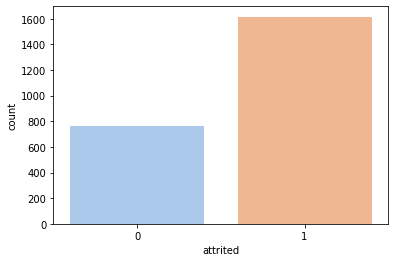

In [52]:
sns.set_palette(sns.color_palette("pastel"))
sns.countplot(newdf["attrited"])
plt.show()

#### **<span style="color:#483D8B;">Observation: </span>**
 - <strong>So we see that almost 67.8 % of the employees have left the organization.   </strong>


#### 6.b. Numerical Features

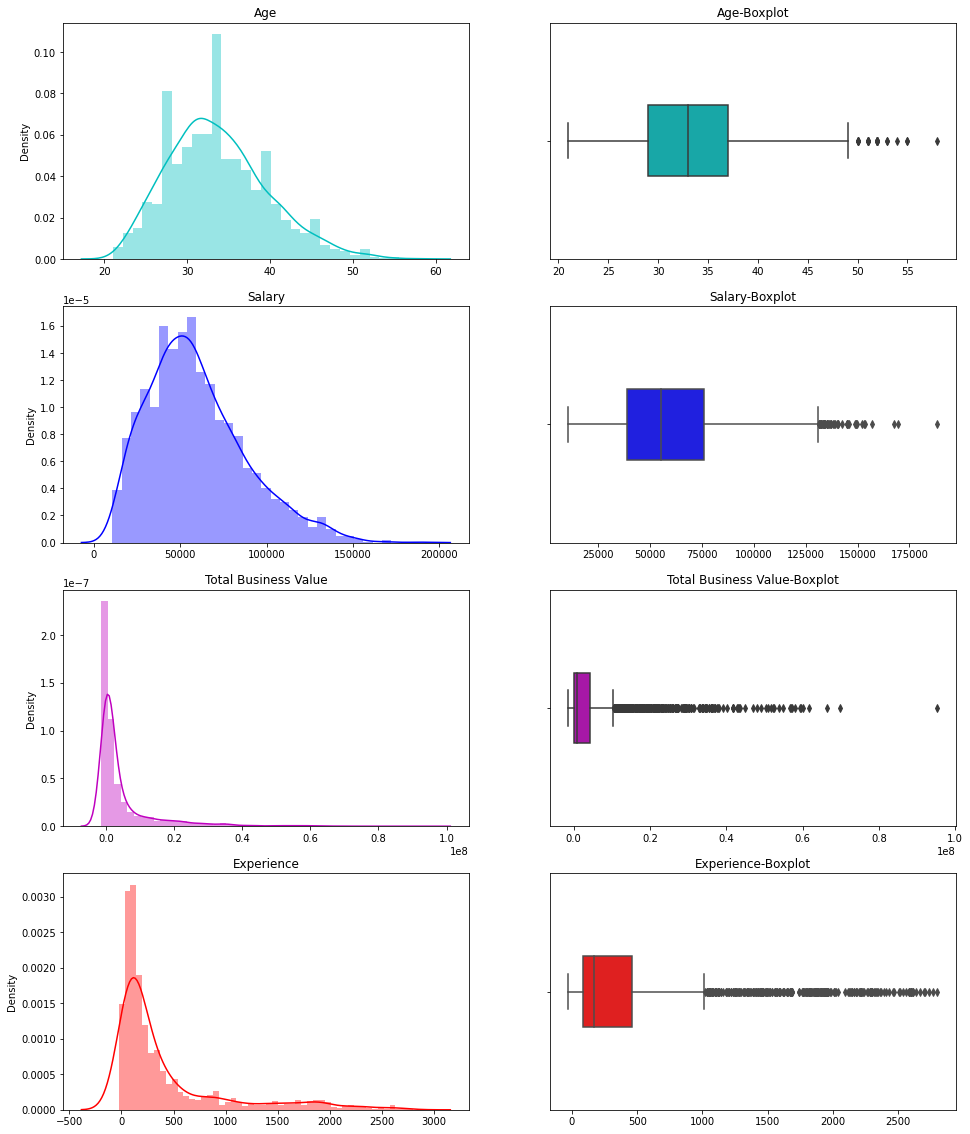

In [53]:
num_cols = ['Age', 'Salary', 'Total Business Value', 'Experience']


cycol = cycle('cbmr')


fig, ax = plt.subplots(len(num_cols),2, figsize=(16,20))

for i in range(len(num_cols)):
    color_next = next(cycol)
    sns.distplot(newdf[num_cols[i]], ax=ax[i,0], color=color_next)
    ax[i,0].set_title(num_cols[i])
    ax[i,0].set_xlabel('')
    sns.boxplot(newdf[num_cols[i]], width = 0.3, ax=ax[i,1], color=color_next)
    ax[i,1].set_title(num_cols[i]+str("-Boxplot"))
    ax[i,1].set_xlabel('')
    
#plt.suptitle("Univariate Plots for Numerical Columns")
plt.show()

In [54]:
newdf[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2381.0,3.366317e+01,5.983375e+00,21.0,29.0,33.0,37.0,58.0
Salary,2381.0,5.933416e+04,2.838367e+04,10747.0,39104.0,55315.0,75986.0,188418.0
Total Business Value,2381.0,4.586742e+06,9.127115e+06,-1385530.0,0.0,817680.0,4173650.0,95331060.0
Experience,2381.0,4.173515e+02,5.650238e+02,-27.0,85.0,172.0,459.0,2801.0


 #### **<span style="color:#483D8B;">Observation: </span>**
 - <strong> The median age of the employees is 33. There are employees as young as 21 years and as old as 58 years.  </strong>
 - <strong> The median income is about 55K. It can range from 10K all the wa to 188K.  </strong>
 - <strong> The median business value generated is 817K. </strong>
 - <strong> The median experience is between 5 to 6 months.   </strong>
 -<strong> It seems that there are outliers. Howver, our data is already small. It might not necessarily be a good idea to drop those outliers. Those may not be because of recording error. </strong>

#### 6.c. Categorical Features

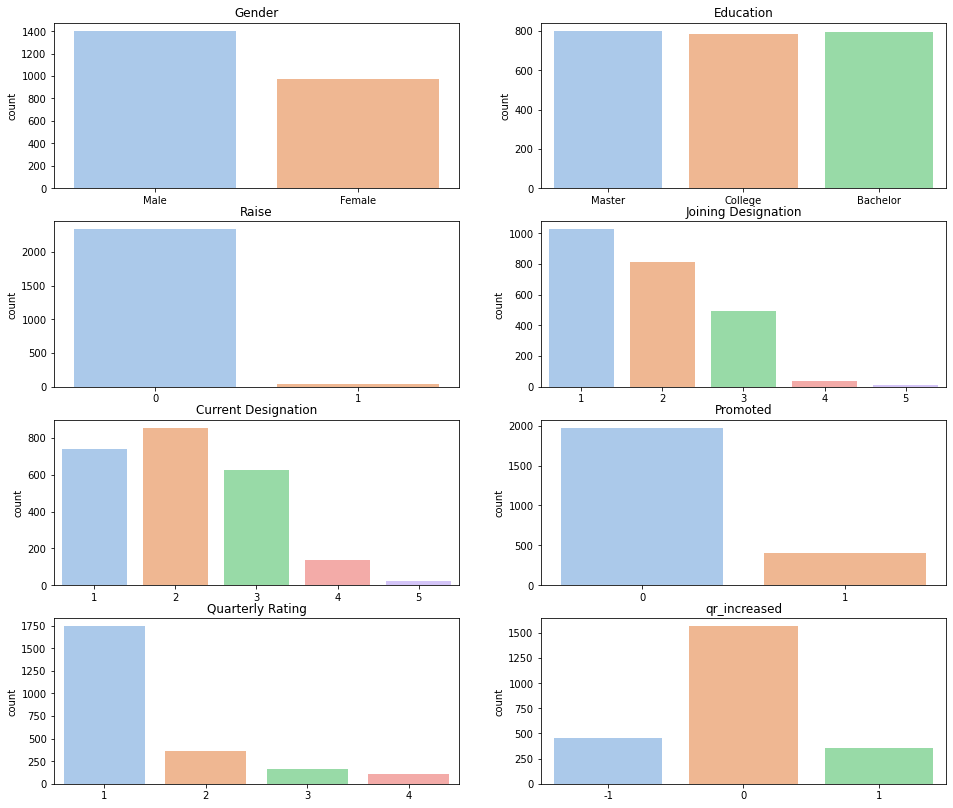

In [55]:
cat_cols = ['Gender', 'Education', 'Raise', 'Joining Designation', 'Current Designation', 'Promoted', 'Quarterly Rating', 'qr_increased']

fig, ax = plt.subplots(4,2, figsize=(16,14))

for i in range(len(cat_cols)):
    sns.countplot(newdf[cat_cols[i]], ax=ax[i//2,i%2])
    ax[i//2,i%2].set_title(cat_cols[i])
    ax[i//2,i%2].set_xlabel('')
    
plt.show()

- We look at the city column separately since it has many categories.

In [56]:
for col in cat_cols:
    display(pd.DataFrame(newdf[col].value_counts(normalize=True)))
    


,Gender
Male,0.589668
Female,0.410332


,Education
Master,0.336833
Bachelor,0.333893
College,0.329273


,Raise
0,0.98194
1,0.01806


,Joining Designation
1,0.430911
2,0.342293
3,0.207056
4,0.015120
5,0.004620


,Current Designation
2,0.359093
1,0.311214
3,0.261655
4,0.057959
5,0.010080


,Promoted
0,0.829063
1,0.170937


,Quarterly Rating
1,0.732465
2,0.152037
3,0.070559
4,0.044939


,qr_increased
0,0.657287
-1,0.192356
1,0.150357


In [57]:
newdf["City"].value_counts()[0:2]

C20    152
C15    101
Name: City, dtype: int64

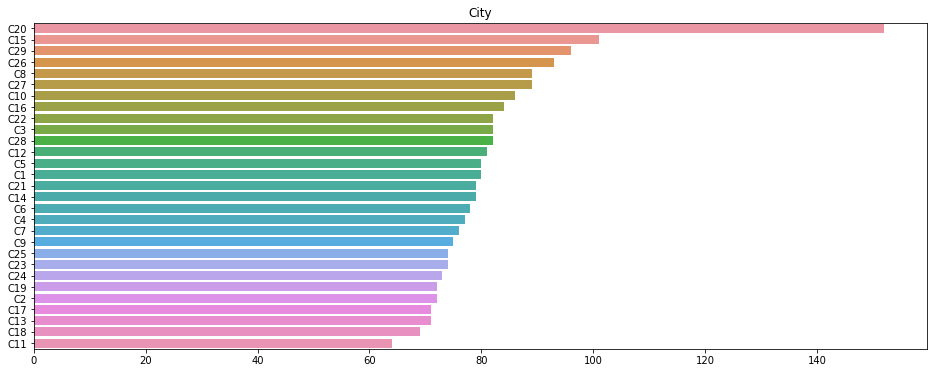

In [58]:
plt.figure(figsize=(16,6))
x = newdf['City'].value_counts()[0:30].values
y = newdf['City'].value_counts()[0:30].index.tolist()

sns.barplot(x = x, y = y, orient='h')
plt.title('City')
plt.show()

#### **<span style="color:#483D8B;">Observation: </span>**
 - <strong> So we see that there are 59% male employees and 41% female employees.  </strong>
 - <strong> The percentages of employees with different education levels are almost equal (~33%)  </strong>
 - <strong> 98.2% of the employees did not receive any income increment. Only 1.8% received a raise. </strong>
 - <strong> Almost 43% of the employees joined at lowest designation (1). 34% joined at level 2, 20% at level 3 and below 2% joined at higher levels.   </strong>
 -<strong> Majority (35%) of the employees currently are at designation level 2, followed by designation level 1 (31%) and 3 (26%). Less than 6% of the employees are currently in higher designations. </strong>
 - <strong> Only 17% of the employees received a promotion, while 83% did not. However, we saw that only 1.8% received a raise in income. So it seems like these people are getting ahead in their grade without receiving the financial compensation. This might lead to dissatisfaction. </strong>
  - <strong>Quarterly Rating is lowest (1) for the majority of employees (73%). Very few received rating over 3 (11.5%). </strong>
 - <strong>Quarterly rating increased for only 15% of employees. It reduced for 19% of the employees and remained unchanged for 65%. </strong>
 - <strong> The majority of the employees seem to be associated with city C20.</strong>

#### 7. Bivariate Analysis

#### 7.a. Numerical Columns v/s Attrition

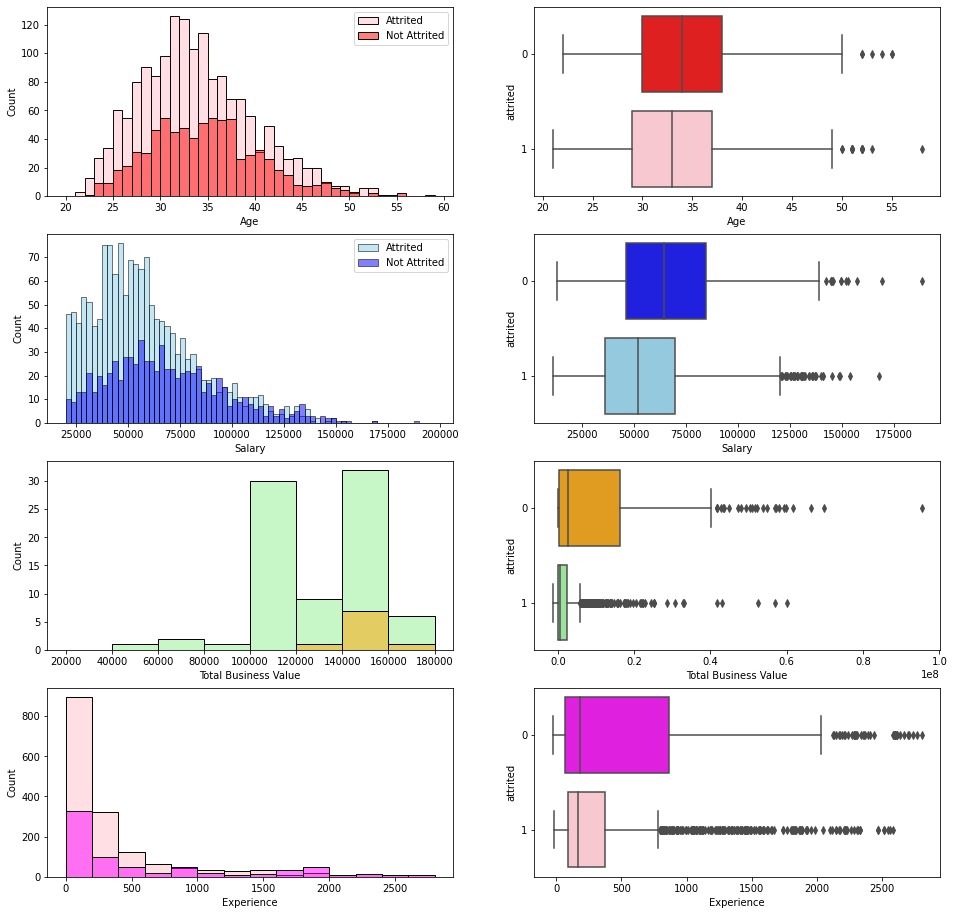

In [59]:
fig, ax = plt.subplots(4,2, figsize=(16,16))

sns.histplot(newdf[newdf["attrited"]==1]["Age"], ax=ax[0][0], label="Attrited", bins=np.arange(20,60,1), color="pink", alpha=0.5)
sns.histplot(newdf[newdf["attrited"]==0]["Age"], ax=ax[0][0], label="Not Attrited", bins=np.arange(20,60,1), color="red", alpha=0.5)
ax[0][0].legend()

pal1 = {1: "pink", 0: "red"}
sns.boxplot(x=newdf["Age"],y=newdf["attrited"],orient='h', ax=ax[0][1], palette=pal1)

sns.histplot(newdf[newdf["attrited"]==1]["Salary"], ax=ax[1][0], label="Attrited", bins=np.arange(20000,200000,2500), color="skyblue", alpha=0.5)
sns.histplot(newdf[newdf["attrited"]==0]["Salary"], ax=ax[1][0],  label="Not Attrited", bins=np.arange(20000,200000,2500), color="blue", alpha=0.5)
ax[1][0].legend()

pal2 = {1: "skyblue", 0: "blue"}
sns.boxplot(x=newdf["Salary"],y=newdf["attrited"],orient='h', ax=ax[1][1], palette=pal2)

sns.histplot(newdf[newdf["attrited"]==1]["Total Business Value"], ax=ax[2][0], label="Attrited", bins=np.arange(20000,200000,20000), color="lightgreen", alpha=0.5)
sns.histplot(newdf[newdf["attrited"]==0]["Total Business Value"], ax=ax[2][0],  label="Not Attrited", bins=np.arange(20000,200000,20000), color="orange", alpha=0.5)
ax[1][0].legend()

pal3 = {1: "lightgreen", 0: "orange"}
sns.boxplot(x=newdf["Total Business Value"],y=newdf["attrited"],orient='h', ax=ax[2][1], palette=pal3)

sns.histplot(newdf[newdf["attrited"]==1]["Experience"], ax=ax[3][0], label="Attrited", bins=np.arange(0,3000,200), color="pink", alpha=0.5)
sns.histplot(newdf[newdf["attrited"]==0]["Experience"], ax=ax[3][0],  label="Not Attrited", bins=np.arange(0,3000,200), color="magenta", alpha=0.5)
ax[1][0].legend()

pal4 = {1: "pink", 0: "magenta"}
sns.boxplot(x=newdf["Experience"],y=newdf["attrited"],orient='h', ax=ax[3][1], palette=pal4)

plt.show()

In [60]:
newdf.groupby('attrited')['Age','Salary','Total Business Value', 'Experience'].median()

,Age,Salary,Total Business Value,Experience
attrited,,,,
0,34.0,64154.0,2636210.0,186.0
1,33.0,51630.0,465025.0,165.0


#### **<span style="color:#483D8B;">Observation: </span>**
 - <strong> The median age for attrited employees is 33, while for non attrited employees it is 34. </strong>
 - <strong> The median income of atrited employees is lower (\~51K) than non attrited employees (\~64K).  </strong>
 - <strong> The median total business value generated by attrited employees (\~46K) is almost 1/6 of the non attrited employees (\~263K) </strong>
 - <strong> The median experience for attrited employees is about 165 days and for non attrited employees it is 186 days.   </strong>

#### 7.b. Categorical Columns vs Attrition

In [61]:
for col in cat_cols:
    d = pd.DataFrame(newdf.groupby([col, 'attrited'])['Salary'].count()).reset_index().rename(columns={'Salary':'percent'})
    a = d.groupby(col)['percent'].transform('sum')
    d['percent'] = d['percent'].div(a)
    d = d[d['attrited']==1]
    display(d)

,Gender,attrited,percent
1,Female,1,0.683726
3,Male,1,0.675214


,Education,attrited,percent
1,Bachelor,1,0.662893
3,College,1,0.691327
5,Master,1,0.682045


,Raise,attrited,percent
1,0,1,0.689906
3,1,1,0.069767


,Joining Designation,attrited,percent
1,1,1,0.732943
3,2,1,0.687117
5,3,1,0.555781
7,4,1,0.611111
9,5,1,0.727273


,Current Designation,attrited,percent
1,1,1,0.804318
3,2,1,0.701754
5,3,1,0.540931
7,4,1,0.507246
9,5,1,0.541667


,Promoted,attrited,percent
1,0,1,0.706687
3,1,1,0.542998


,Quarterly Rating,attrited,percent
1,1,1,0.821101
3,2,1,0.403315
5,3,1,0.166667
7,4,1,0.093458


,qr_increased,attrited,percent
1,-1,1,0.810044
3,0,1,0.743131
5,1,1,0.229050


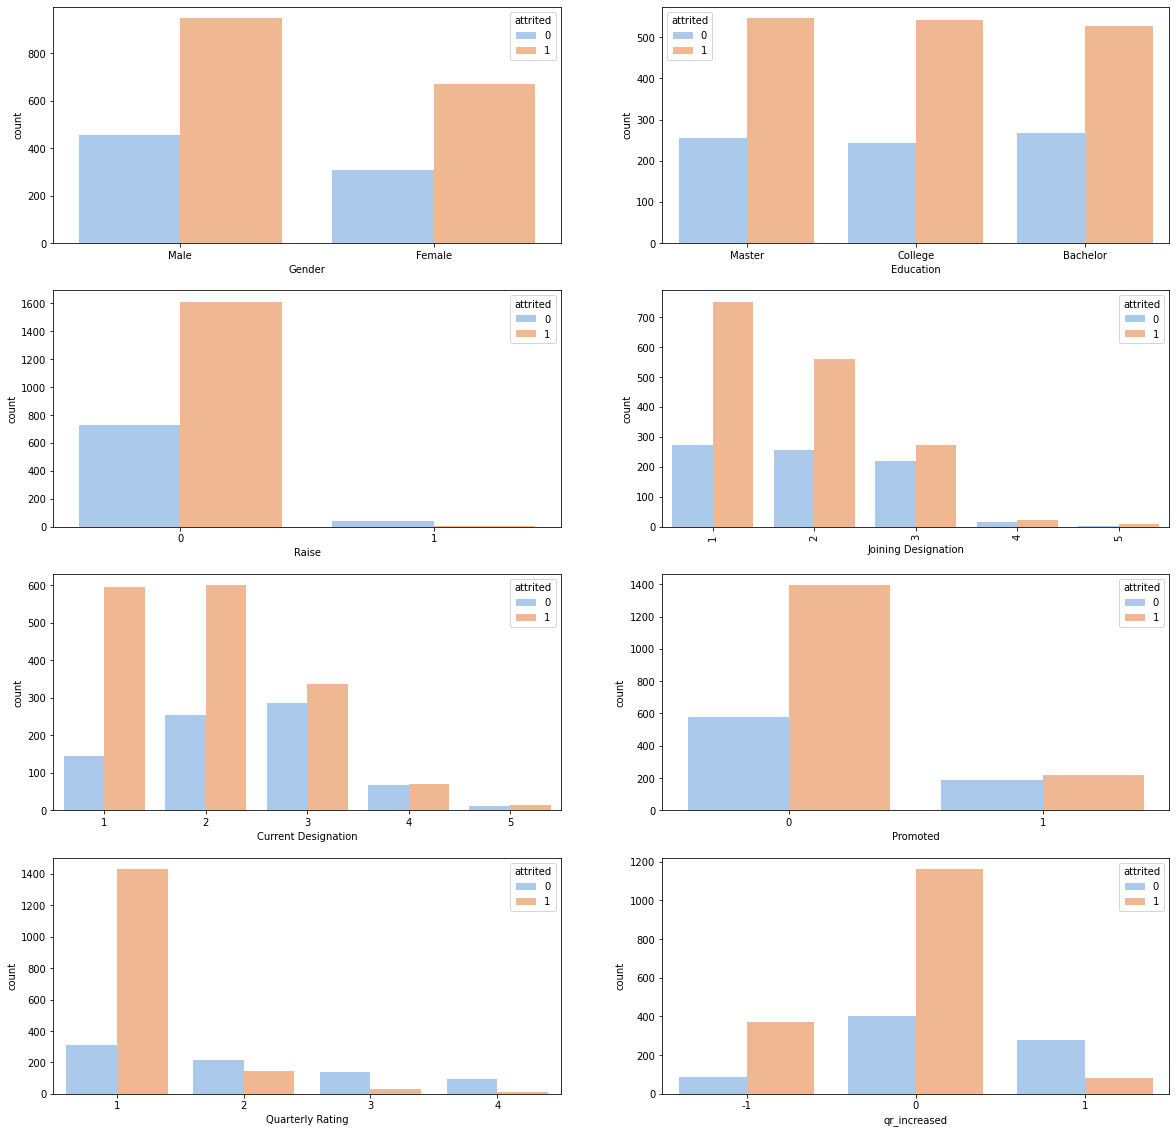

In [62]:
fig, ax = plt.subplots(4,2, figsize=(20,20))

sns.countplot(x = "Gender", data = newdf, hue = "attrited", ax=ax[0][0])
sns.countplot(x = "Education", data = newdf, hue = "attrited", ax=ax[0][1])
sns.countplot(x = "Raise", data = newdf, hue = "attrited", ax=ax[1][0])
sns.countplot(x = "Joining Designation", data = newdf, hue = "attrited", ax=ax[1][1])
sns.countplot(x = "Current Designation", data = newdf, hue = "attrited", ax=ax[2][0])
sns.countplot(x = "Promoted", data = newdf, hue = "attrited", ax=ax[2][1])
sns.countplot(x = "Quarterly Rating", data = newdf, hue = "attrited", ax=ax[3][0])
sns.countplot(x = "qr_increased", data = newdf, hue = "attrited", ax=ax[3][1])
ax[1][1].tick_params(axis='x', rotation=90)
plt.show()

#### **<span style="color:#483D8B;">Observation: </span>**
 - <strong> The attrition rate of male and female employees is similar (\~67-68%).  </strong>
 - <strong> The attrition rate across different education levels is also similar (from 66-69%).  </strong>
 - <strong> The attrition among those who received raise (7%) is far lower than those who did not receive raise (68%). </strong>
 - <strong> The atrition is highest among those whose current designation is 1 (80%) followed by 2 (70%). The rate is around 50-54% for the remaining designation.   </strong>
 -<strong>The attrition rate is 70% for those who were not promoted and 54% for those who were promoted. </strong>
 - <strong> The attrtion rate follows a clear declinig pattern with increasing quarterly rating : 1 (82%), 2 (40%), 3 (16%) and 4 (9%). </strong>
 - <strong>The attrtion rate is highest among those whose quarterly rating decreased (81%), followed by those whose rating remained unchanged (74%) and finally those whose rating increased (23%). </strong>

#### 8. Heatmaps to check Correlation

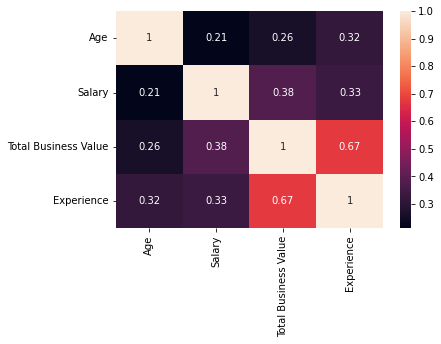

In [63]:
sns.heatmap(newdf.corr(), annot=True)
plt.show()

- <strong>There is mopderate correlation between the Total Business Value and Experience features, which is somewhat expected, since the longer a person works, the more likely it is for him to generate positive business value and higher the sum of monthly business values.</strong>

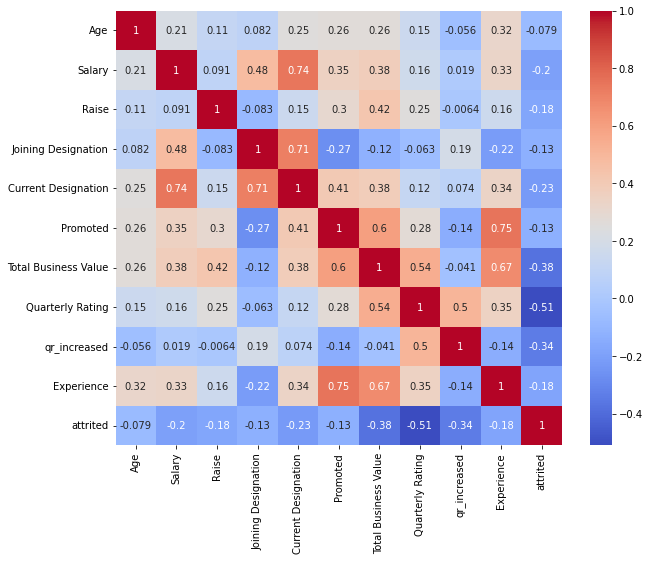

In [64]:
plt.figure(figsize=(10,8))
df1 = newdf.copy()
cat_cols1 = [
 'Raise',
 'Joining Designation',
 'Current Designation',
 'Promoted',
 'Quarterly Rating',
 'qr_increased',
 'attrited']

for col in cat_cols1:
    df1[col] = df1[col].astype('int64')
    
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.show()

#### **<span style="color:#483D8B;">Observation: </span>**
 - <strong> There is moderate correlation between Current Designation and Income which is expected since the higher the designation, the greater the income. </strong>
 - <strong> Also, there is moderate correlation between the current designation and joining designation.</strong>
 - <strong> Again, there is moderate correlation between Experience nd Promotion (the longer a person has been working, the higher the chance of getting promoted. </strong>

In [65]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   2381 non-null   int64  
 1   Gender                2381 non-null   object 
 2   Education             2381 non-null   object 
 3   City                  2381 non-null   object 
 4   Salary                2381 non-null   int64  
 5   Raise                 2381 non-null   object 
 6   Joining Designation   2381 non-null   object 
 7   Current Designation   2381 non-null   object 
 8   Promoted              2381 non-null   object 
 9   Total Business Value  2381 non-null   int64  
 10  Quarterly Rating      2381 non-null   object 
 11  qr_increased          2381 non-null   object 
 12  Experience            2381 non-null   float64
 13  attrited              2381 non-null   object 
dtypes: float64(1), int64(3), object(10)
memory usage: 260.5+ KB


In [66]:
newdf.head()

,Age,Gender,Education,City,Salary,Raise,Joining Designation,Current Designation,Promoted,Total Business Value,Quarterly Rating,qr_increased,Experience,attrited
0,28,Male,Master,C23,57387,0,1,1,0,1715580,2,0,68.0,1
1,31,Male,Master,C7,67016,0,2,2,0,0,1,0,25.0,0
2,43,Male,Master,C13,65603,0,2,2,0,350000,1,0,115.0,1
3,29,Male,College,C9,46368,0,1,1,0,120360,1,0,52.0,1
4,31,Female,Bachelor,C11,78728,0,3,3,0,1265000,2,1,123.0,0


<a id = "seven"></a>
<h1 id="basics" style="background:black; padding: 10px 0; border:#FFC300; border-width:5px; border-radius: 10px; border-style:solid; font-family:MV Boli; color:white; line-height: 10px;"> 
    <center> ◽ Encoding Categorical Features + Train-Test Split ◽
    </center>
</h1>

#### 1. Encoding of Categorical Features

- Raise, Promoted and qr_increased are already represented as 0 or 1.
- Joining Designation, Current Designation and Quarterly Rating could be one hot encoded, however, they have inherent order and it would be wise to preserve that order (say somehow 0 and 4 get grouped together while splitting if we treat it as categorical, which may not make logical sense).
- City could be one hot encoded but there would be too many resultant columns, so we can perform target encoding for it instead.
- Education can be label encoded (0 : College, 1:Bachelor, 2:Master)
- Gender can be represented as 0-1 encoding : Male : 0, Female: 1


In [67]:
newdf['Education'] = newdf['Education'].map({'College':0,'Bachelor':1,'Master':2})
newdf['Gender'] = newdf['Gender'].map({'Male':0, 'Female':1})

#### 2. Train Test Split

We will first separate out the independent and the dependent columns.

In [68]:
Y = newdf["attrited"]
Y = Y.astype('int')
X = newdf.drop(columns=['attrited'])

print(X.shape)
print(Y.shape)

(2381, 13)
(2381,)


Next we perform train test split.

In [69]:


#X = np.array(X.values.tolist())
#Y = np.array(Y.values.tolist())

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1001)
print(f"Sizes of the sets created are:\nTraining set:{X_train.shape[0]}\nTest set:{X_test.shape[0]}")

Sizes of the sets created are:
Training set:1904
Test set:477


So we see that we have around 1904 training observations and 477 test observations.

#### 3. Target Encoding
Next, we perform target encoding. We fit the encoder on the training data. We use the same encoder to transform our test data (we do not fit on test data so that there is no 'leakage' of target values of the test data).

In [70]:
import category_encoders as ce

ce_target = ce.TargetEncoder(cols=['City'])

X_train = ce_target.fit_transform(X_train, Y_train)
X_test = ce_target.transform(X_test)

In [71]:
X_train.head()

,Age,Gender,Education,City,Salary,Raise,Joining Designation,Current Designation,Promoted,Total Business Value,Quarterly Rating,qr_increased,Experience
344,41,1,1,0.773585,58207,0,1,2,1,16290800,3,0,1659.0
317,36,0,0,0.638889,109992,0,3,3,0,3526230,2,0,238.0
2330,27,1,2,0.573770,28318,0,1,1,0,5302040,3,1,265.0
2071,36,0,2,0.779661,39195,0,1,1,0,0,1,0,2.0
2122,36,1,1,0.807018,40775,0,1,1,0,2424000,1,-1,888.0


Next we shall check the class imbalance of our sets.

In [72]:
Y_train.value_counts(normalize=True)

1    0.681197
0    0.318803
Name: attrited, dtype: float64

In [73]:
Y_test.value_counts(normalize=True)

1    0.668763
0    0.331237
Name: attrited, dtype: float64

#### **<span style="color:#483D8B;">Observation: </span>**
- <strong>So we see that there is similar distribution of attrition in both the train and test data. So we have class imbalance. We have to treat it while we train our models.</strong>

<a id = "eight"></a>
<h1 id="basics" style="background:black; padding: 10px 0; border:#FFC300; border-width:5px; border-radius: 10px; border-style:solid; font-family:MV Boli; color:white; line-height: 10px;"> 
    <center> ◽ Simple Decision Tree Classifier ◽
    </center>
</h1>

### 1. Simple Decision Tree Classifier

 - We will use 5 fold Cross Validation.
 - We will use Stratified K-Fold. Our training Data is only about 1904 observations in size. Of these, we have around 1286 positive class observations and 618 negative class observations, which turns out to be a 68:32 ratio.. If we perform 5 fold stratified CV on this, we should roughly get 257 positive and 124 negative points. Since the size is small, if we choose the folds randomly, we might end up with different ratio than expected, in each of the folds.
 - We will use GridSearch to tune the hyperparameters, since we are training a single decision tree on a small data and it will not take a lot of time.
 - We will treat class imbalance in the following ways:
     - Using class weights : We will keep this as a hyperparameter
     - Using oversampling (by SMOTE)
     - We will NOT use undersampling since the data size is already small.
 - We will consider maximum tree depth, and maximum number of leaf nodes as the other hyperparameters.
 

#### 1.a. Treating imbalance using Class Weights

In [74]:
cl1 = Y_train.value_counts().values[0]
cl0 = Y_train.value_counts().values[1]
r0 = 1
r1 = round(cl1/cl0,2)
print("Ratio of class0 to class1 is", r0, ":", r1)

Ratio of class0 to class1 is 1 : 2.14


In [75]:

#We could also treat weights as hyperparameters.
weights = {0:r1, 1:r0}
model1 = DecisionTreeClassifier()

#hyper parameters which we will tune using GridSearch
params = {
    "class_weight" : [{0:1, 1:1}, {0:r1, 1:r0}, {0:3, 1:1},],
    "max_depth" : [5, 7, 10], #the maximum depth of the tree
    "max_leaf_nodes" : [20, 25, 30] #the number of leaf nodes of the tree
}

#stratified k fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state = 1001)
#specifying our classifier
clf = GridSearchCV(model1, params, scoring = "f1", cv=skf.split(X_train,Y_train))
#Training the model
clf.fit(X_train, Y_train)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f4c06b942d0>,
             estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 2.14, 1: 1},
                                          {0: 3, 1: 1}],
                         'max_depth': [5, 7, 10],
                         'max_leaf_nodes': [20, 25, 30]},
             scoring='f1')

In [76]:
#The classifier with the best hyper parameters
print(clf.best_estimator_)

DecisionTreeClassifier(class_weight={0: 1, 1: 1}, max_depth=5,
                       max_leaf_nodes=20)


#### **<span style="color:#483D8B;">Observation: </span>**
- <strong>It turns out that the original class weighting still gives us better performance. </strong>

#### Learning Curves
Next we will look at the learning curve. It plots the 'Score' obtained from various models trained on different sizes of the training data. 
Please look at https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html for details on other possible plots.

In [77]:
# Learning Curves


def plot_learning_curve(estimator, X, Y, title):

    train_sizes, train_scores, test_scores, _, _ = learning_curve(estimator,X,Y,return_times=True)

    fig, axes = plt.subplots(1, 1, figsize = (10, 5))

    axes.set_title(title)
    axes.plot
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")


    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(
      train_sizes,
      train_scores_mean - train_scores_std,
      train_scores_mean + train_scores_std,
      alpha=0.1,
      color="r",
    )
    axes.fill_between(
      train_sizes,
      test_scores_mean - test_scores_std,
      test_scores_mean + test_scores_std,
      alpha=0.1,
      color="g",
    )
    axes.plot(
      train_sizes, train_scores_mean, "o-", color="r", label="Training score"
      )
    axes.plot(
      train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
      )
    axes.legend(loc="best")

    plt.show()

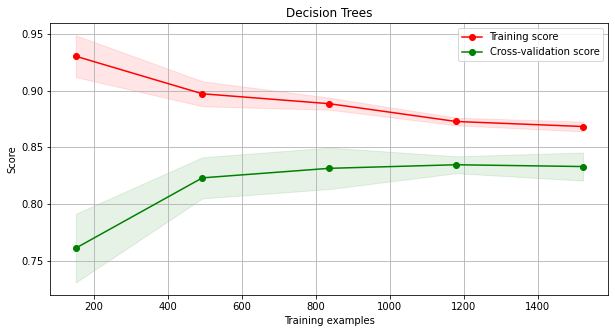

0.8639705882352942


In [78]:
model1 = clf.best_estimator_

model1.fit(X_train, Y_train)

plot_learning_curve(model1, X_train, Y_train, "Decision Trees")

print(model1.score(X_train, Y_train))

#### **<span style="color:#483D8B;">Observation: </span>**
 - So we see that the training score is very high at the beginning and decreases and the cross-validation score is low at the beginning and increases.

- In the beginning, with very few samples our model is overfitting. As the number of samples increases, our model starts generalizing better and our CV score improves. 

- We see that our training and CV scores appear to be close at 1900 samples. We might be able to get only a slight improvement with more training samples, but not too much.

- The highest cross validation score obtained was around 0.84.

#### Visualizing what the tree looks like
Next, we could also visualize the tree that we have trained.

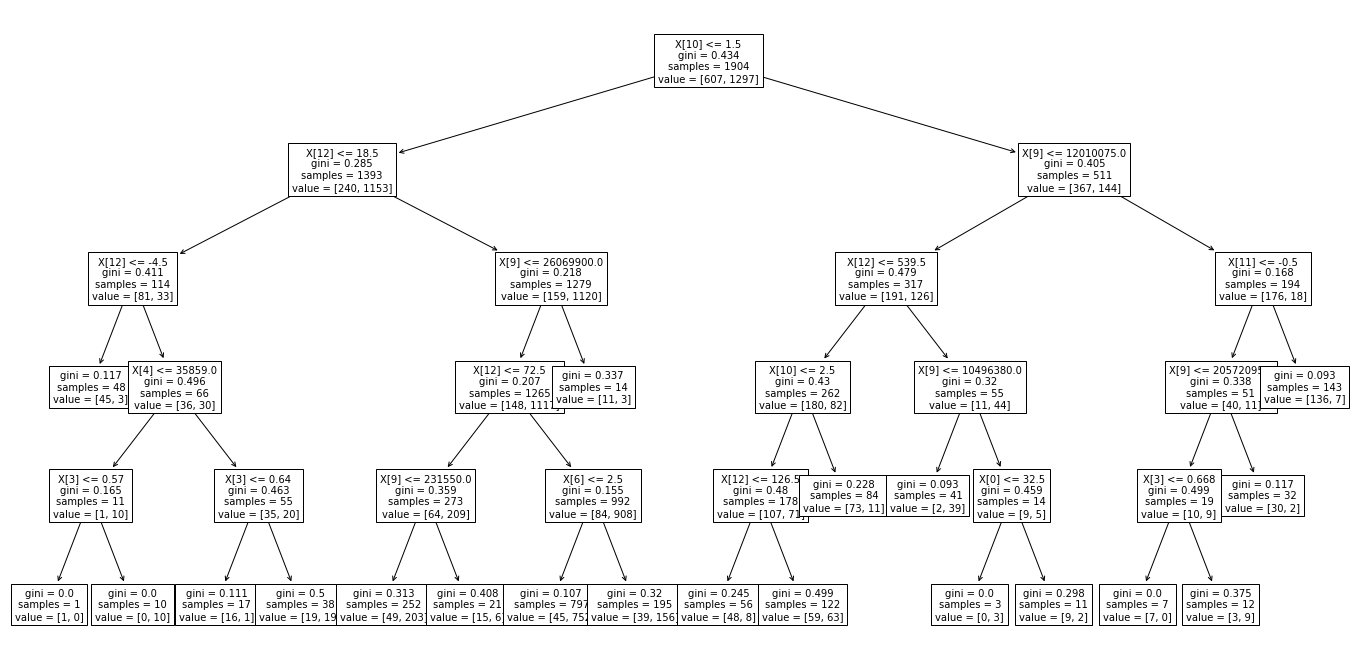

In [79]:


plt.figure(figsize=(24,12))  # set plot size (denoted in inches)
tree.plot_tree(model1, fontsize=10)
plt.show()

#### Test Performance

In [80]:
print(f"Training F1 score:{model1.score(X_train, Y_train)}\nTest F1 score: {model1.score(X_test, Y_test)}")

Training F1 score:0.8639705882352942
Test F1 score: 0.8050314465408805


#### 1.b. Treating Class Imbalance using SMOTE Oversampling

In [81]:
smote = SMOTE(random_state=1001)
X_train_ov, Y_train_ov = smote.fit_resample(X_train, Y_train)

In [82]:
Y_train_ov.value_counts() #We now have equal observations in both classes,

0    1297
1    1297
Name: attrited, dtype: int64

In [83]:
#stratified k fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state = 1001)

model1_ov = DecisionTreeClassifier()

#parameters which we will tune using GridSearch. We do not need class weights as we have balanced our data.
params_ov = {
    "max_depth" : [3, 5, 7], #the maximum depth of the tree
    "max_leaf_nodes" : [15, 20, 25] #the number of leaf nodes of the tree
}

#specifying our classifier
clf_ov = GridSearchCV(model1_ov, params_ov, scoring = "f1", cv=skf.split(X_train,Y_train))
#Training the model
clf_ov.fit(X_train_ov, Y_train_ov)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f4bfc77f2d0>,
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'max_leaf_nodes': [15, 20, 25]},
             scoring='f1')

#### Learning Curve

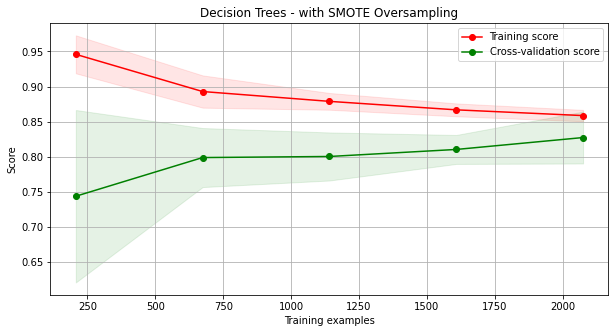

0.8492675404780262


In [84]:
model1_ov = clf_ov.best_estimator_

model1_ov.fit(X_train_ov, Y_train_ov)

plot_learning_curve(model1_ov, X_train_ov, Y_train_ov, "Decision Trees - with SMOTE Oversampling")

print(model1_ov.score(X_train_ov, Y_train_ov))

#### **<span style="color:#483D8B;">Observation: </span>**
- We obtain a similar learning curve as before, but looks like our CV score is still increasing but only a little. The highest cross validation score obtained was around 0.83 - 0.84.

#### Test Performace

In [85]:
print(f"Training F1 score:{model1_ov.score(X_train_ov, Y_train_ov)}\nTest F1 score: {model1_ov.score(X_test, Y_test)}")

Training F1 score:0.8492675404780262
Test F1 score: 0.7777777777777778


### Comparing Test Performance and Feature Importance of the two Decision Tree Classifiers

#### 1. Feature Importance

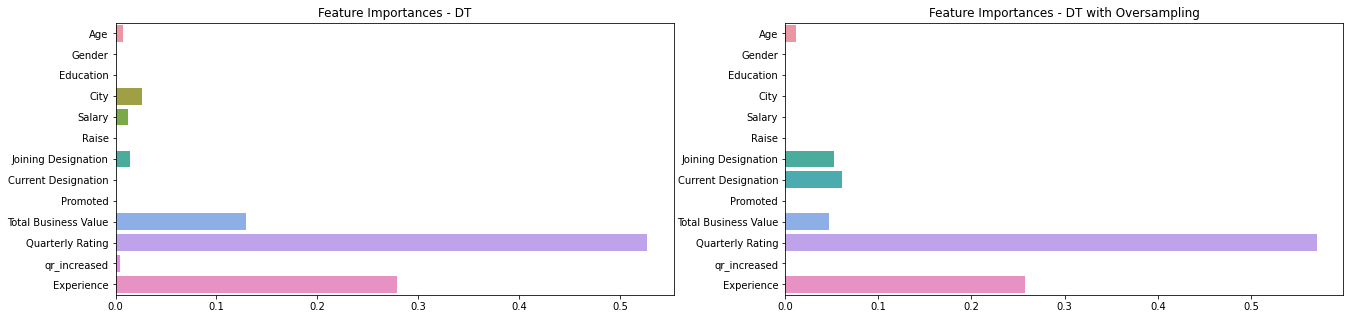

In [86]:
dt_feat_imp = model1.feature_importances_
dt_feat_imp_ov = model1_ov.feature_importances_

fig, ax = plt.subplots(1,2, figsize=(22, 5))

sns.barplot(y = list(X_train.columns), x = dt_feat_imp, orient='h', ax=ax[0])
ax[0].set_title("Feature Importances - DT")
sns.barplot(y = list(X_train.columns), x = dt_feat_imp_ov, orient='h', ax=ax[1])
ax[1].set_title("Feature Importances - DT with Oversampling")
plt.show()

#### 2. Precision, Recall and F1 scores

We already saw that the F1 score on test data was higher for the base model without oversampling.
We will check the classification reports for the two models.

In [87]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve, auc
Y_test_pred = model1.predict(X_test)
Y_test_pred_ov = model1_ov.predict(X_test)
print("DT model:")
print(classification_report(Y_test, Y_test_pred))
print("-"*60)
print("\nDT model with oversampling :")
print(classification_report(Y_test, Y_test_pred_ov))

DT model:
              precision    recall  f1-score   support

           0       0.79      0.56      0.66       158
           1       0.81      0.92      0.86       319

    accuracy                           0.81       477
   macro avg       0.80      0.74      0.76       477
weighted avg       0.80      0.81      0.80       477

------------------------------------------------------------

DT model with oversampling :
              precision    recall  f1-score   support

           0       0.66      0.67      0.67       158
           1       0.84      0.83      0.83       319

    accuracy                           0.78       477
   macro avg       0.75      0.75      0.75       477
weighted avg       0.78      0.78      0.78       477



#### **<span style="color:#483D8B;">Observation: </span>**
 - We look at the precision, recall and F1 scores for the '1' (attrited) class, since that is what we are trying to predict.

- So the base model has Precision, Recall and F1 score of 0.81, 0.93 and 0.86 respectively.
- And the model with oversampling has the values as 0.84, 0.83 and 0.83 respectively.

- <strong>So the precision is higher for the second model, but the recall and F1 score are better for the base model which used class weights as hyper parameters. </strong>

#### 3. Accuracy and Confusion Matrices

In [88]:
print("Test accuracy for simple DT -", accuracy_score(Y_test, Y_test_pred))
print("Test accuracy for DT with oversampling -", accuracy_score(Y_test, Y_test_pred_ov))

Test accuracy for simple DT - 0.8050314465408805
Test accuracy for DT with oversampling - 0.7777777777777778


In [89]:
print("Confusion matrix format:")
print("   0   1")
print("   _____")
print("0 |__|__|")
print("1 |__|__|")
print("-"*60)

print("\nDT model:")
print(confusion_matrix(Y_test, Y_test_pred))
print("-"*60)
print("\nDT model with oversampling :")
print(confusion_matrix(Y_test, Y_test_pred_ov))

Confusion matrix format:
   0   1
   _____
0 |__|__|
1 |__|__|
------------------------------------------------------------

DT model:
[[ 89  69]
 [ 24 295]]
------------------------------------------------------------

DT model with oversampling :
[[106  52]
 [ 54 265]]


#### **<span style="color:#483D8B;">Observation: </span>**
- <strong>So once again we see that the base DT seems to be performng better w.r.t prediction of positive class and also has better accuracy.</strong>

#### 4. ROC Curves, Area under ROC Curves

[]

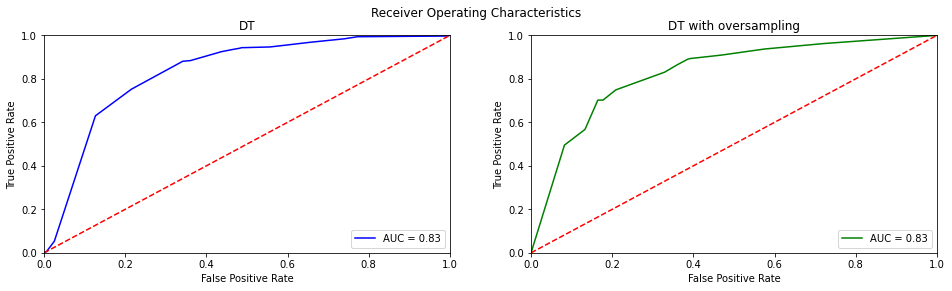

In [90]:
probs_y=model1.predict_proba(X_test) 
precision, recall, thresholds = precision_recall_curve(Y_test, probs_y[:, 1]) 
probs_y_ov=model1_ov.predict_proba(X_test) 
precision_ov, recall_ov, thresholds_ov = precision_recall_curve(Y_test, probs_y_ov[:, 1]) 


fpr, tpr, thresholds = roc_curve(Y_test, probs_y[:,1], drop_intermediate=False)
roc_auc = auc(fpr, tpr)
fpr_ov, tpr_ov, thresholds_ov = roc_curve(Y_test, probs_y_ov[:,1], drop_intermediate=False)
roc_auc_ov = auc(fpr_ov, tpr_ov)

fig, ax = plt.subplots(1,2, figsize=(16,4))

plt.suptitle('Receiver Operating Characteristics')

ax[0].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
ax[0].legend(loc = 'lower right')
ax[0].plot([0, 1], [0, 1],'r--')
ax[0].set_xlim([0, 1])
ax[0].set_ylim([0, 1])
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_title("DT")


ax[1].plot(fpr_ov, tpr_ov, 'g', label = 'AUC = %0.2f' % roc_auc_ov)
ax[1].legend(loc = 'lower right')
ax[1].plot([0, 1], [0, 1],'r--')
ax[1].set_xlim([0, 1])
ax[1].set_ylim([0, 1])
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_title("DT with oversampling")


plt.plot()

#### **<span style="color:#483D8B;">Observation: </span>**
- <strong>So we see that the base DT model and the oversampled data model have same AUC of 0.83</strong>

<strong>So from <mark>Section 1</mark>, the best model seems to be : <mark>model1</mark></strong>
#### 

<a id = "nine"></a>
<h1 id="basics" style="background:black; padding: 10px 0; border:#FFC300; border-width:5px; border-radius: 10px; border-style:solid; font-family:MV Boli; color:white; line-height: 10px;"> 
    <center> ◽ Gradient Boosted Decision Trees using XGBoost ◽
    </center>
</h1>

### 2. Gradient Boosted Decision Trees (XgBoost)

 - We will again use 5 fold Cross Validation.
 - We will use Stratified K-Fold.
 - We will use GridSearch and try out RandomSearch to tune the hyperparameters. If GridSearch ends up taking a lot of time to  train, we might go with RandomSearch. If it manages to finish within reasonable time, we can stick with GridSearch.
 - We will treat class imbalance in the following ways:
     - Using class weights : We will keep this as a hyperparameter
     - Using oversampling (by SMOTE)
 - We will consider maximum tree depth, learning rate, row sampling and column sampling rates as the other hyperparameters.
 - We will use 100 base learners.

#### 2.a. Using Class Weights

- According to the XGBoost documentation, a typical value to consider to balance the positive and negative weights is:

sum(negative instances) / sum(positive instances)

- scale_pos_weight = total_negative_examples / total_positive_examples

In [91]:
Y_train.value_counts()

1    1297
0     607
Name: attrited, dtype: int64

#### Random Search
We will first look at Random Search.

In [92]:


for col in X_train.columns:
    X_train[col] = X_train[col].astype('int')
    X_test[col] = X_test[col].astype('int')

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')


scale_pos_w = 606/1298
#hyper-parameters
params = {
        'scale_pos_weight' : [0.5, 1, scale_pos_w, 5],
        'learning_rate': [0.1, 0.5, 0.8],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

#XgBoost Classifier
xgb = XGBClassifier(n_estimators=100, objective='binary:logistic')

folds = 5
#Stratified k-folds
skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state = 1001)

#model with random search for hyper parameter tuning
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=50, scoring='f1', n_jobs=4, cv=skf.split(X_train,Y_train), verbose=0, random_state=1001)

#Training
start = dt.datetime.now()
random_search.fit(X_train, Y_train)
end = dt.datetime.now()

#### Best Model obtained by Random Search

In [93]:
print('\n Best hyperparameters:')
print(random_search.best_params_)
random_best = random_search.best_params_


 Best hyperparameters:
{'subsample': 0.8, 'scale_pos_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.6}


#### **<span style="color:#483D8B;">Observation: </span>**
 - So just like the simple DT, we once again end up obtaining best results with original class weights.

In [94]:
subsample = random_best['subsample']
max_depth = random_best['max_depth']
learning_rate = random_best['learning_rate']
colsample_bytree = random_best['colsample_bytree']
scale_pos_weight = random_best['scale_pos_weight']

best_xgb_random = XGBClassifier(n_estimators=100, objective='binary:logistic', subsample=subsample, max_depth=max_depth, learning_rate=learning_rate, colsample_bytree=colsample_bytree, scale_pos_weight=scale_pos_weight)
best_xgb_random.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

#### Learning Curve

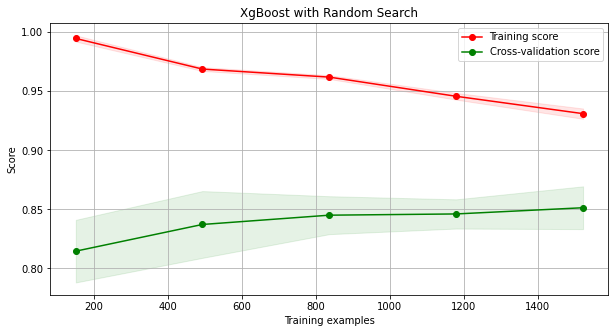

In [95]:
plot_learning_curve(best_xgb_random, X_train, Y_train, "XgBoost with Random Search")

#### **<span style="color:#483D8B;">Observation: </span>**
- The highest cross validation score obtained was around 0.85. It might improve with more training samples.

#### Test Performance

In [96]:
print(f"Time taken for training : {end - start}\nTraining F1 score:{best_xgb_random.score(X_train, Y_train)}\nTest F1 score: {best_xgb_random.score(X_test, Y_test)}")

Time taken for training : 0:00:37.588029
Training F1 score:0.9296218487394958
Test F1 score: 0.8280922431865828


#### Grid Search

In [97]:
#hyper parameters for grid search
params = {
        'scale_pos_weight' : [0.5, 1, scale_pos_w, 5],
        'learning_rate': [0.1, 0.5, 0.8],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

#XgBoost Classifier
xgb = XGBClassifier(n_estimators=100, objective='binary:logistic')

folds = 5
#Stratified k-folds
skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state = 1001)

#model with grid search for hyperparameter tuning
grid_search = GridSearchCV(xgb, params, scoring='f1', n_jobs=4, cv=skf.split(X_train,Y_train))


start = dt.datetime.now()
grid_search.fit(X_train, Y_train)
end = dt.datetime.now()

#### Best model obtained by Grid Search

In [98]:
print('\n Best hyperparameters:')
print(grid_search.best_params_)
grid_best = grid_search.best_params_


 Best hyperparameters:
{'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 5, 'scale_pos_weight': 1, 'subsample': 1.0}


In [99]:
subsample = grid_best['subsample']
max_depth = grid_best['max_depth']
learning_rate = grid_best['learning_rate']
colsample_bytree = grid_best['colsample_bytree']
scale_pos_weight = random_best['scale_pos_weight']

best_xgb_grid = XGBClassifier(n_estimators=100, objective='binary:logistic', subsample=subsample, max_depth=max_depth, learning_rate=learning_rate, colsample_bytree=colsample_bytree, scale_pos_weight=scale_pos_weight)
best_xgb_grid.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

#### Learning Curve

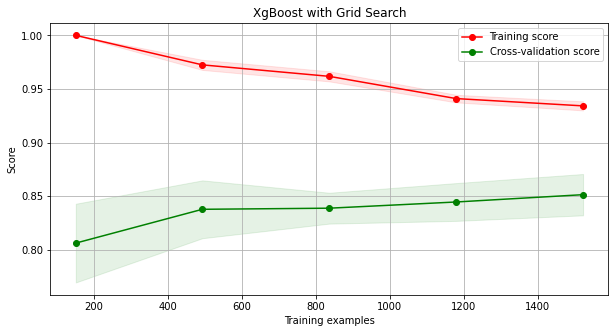

In [100]:
plot_learning_curve(best_xgb_grid, X_train, Y_train, "XgBoost with Grid Search")

#### **<span style="color:#483D8B;">Observation: </span>**
- The highest cross validation score obtained was slightly above 0.85.

#### Test Performance

In [101]:
print(f"Time taken for training : {end - start}\nTraining F1 score:{best_xgb_grid.score(X_train, Y_train)}\nTest F1 score: {best_xgb_grid.score(X_test, Y_test)}")

Time taken for training : 0:03:46.786364
Training F1 score:0.9259453781512605
Test F1 score: 0.8197064989517819


#### **<span style="color:#483D8B;">Observation: </span>**
- <strong>So, it appears that the performance of the model obtained by random search, on test data, is better than that obtained by grid search (even though the best CV scores for Grid Search model is only slightly higher than that of the Random Search Model.</strong>

<strong>We will pick the <mark>random search model</mark> from section 2.a. for our later comparisons. </strong>

#### 2.b. Model on Oversampled Data

#### Random Search

In [102]:
for col in X_train_ov.columns:
    X_train_ov[col] = X_train_ov[col].astype('int')
Y_train_ov = Y_train_ov.astype('int')

#hyper-parameters
params = {
        'learning_rate': [0.1, 0.5, 0.8],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

#XgBoost Classifier
xgb = XGBClassifier(n_estimators=100, objective='binary:logistic')

folds = 5
#Stratified k-folds
skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state = 1001)

#model with random search for hyper parameter tuning
random_search_ov = RandomizedSearchCV(xgb, param_distributions=params, n_iter=50, scoring='f1', n_jobs=4, cv=skf.split(X_train_ov,Y_train_ov), verbose=0, random_state=1001 )

#Training
start = dt.datetime.now()
random_search_ov.fit(X_train_ov, Y_train_ov)
end = dt.datetime.now()

#### Best Model obtained by Random Search

In [103]:
print('\n Best hyperparameters:')
print(random_search_ov.best_params_)
random_best_ov = random_search_ov.best_params_


 Best hyperparameters:
{'subsample': 1.0, 'max_depth': 5, 'learning_rate': 0.5, 'colsample_bytree': 0.8}


In [104]:
subsample = random_best_ov['subsample']
max_depth = random_best_ov['max_depth']
learning_rate = random_best_ov['learning_rate']
colsample_bytree = random_best_ov['colsample_bytree']

best_xgb_random_ov = XGBClassifier(n_estimators=100, objective='binary:logistic', subsample=subsample, max_depth=max_depth, learning_rate=learning_rate, colsample_bytree=colsample_bytree)
best_xgb_random_ov.fit(X_train_ov, Y_train_ov)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [105]:
print(f"Time taken for training : {end - start}\nTraining F1 score:{best_xgb_random_ov.score(X_train_ov, Y_train_ov)}\nTest F1 score: {best_xgb_random_ov.score(X_test, Y_test)}")

Time taken for training : 0:00:39.633338
Training F1 score:0.9980724749421742
Test F1 score: 0.7945492662473794


#### Grid Search

In [106]:
#hyper parameters for grid search
params = {
        'learning_rate': [0.1, 0.5, 0.8],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

#XgBoost Classifier
xgb = XGBClassifier(n_estimators=100, objective='binary:logistic')

#Stratified k-folds
folds = 5
skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state = 1001)

#model with grid search for hyperparameter tuning
grid_search_ov = GridSearchCV(xgb, params, scoring='f1', n_jobs=4, cv=skf.split(X_train_ov,Y_train_ov))


start = dt.datetime.now()
grid_search_ov.fit(X_train_ov, Y_train_ov)
end = dt.datetime.now()

In [107]:
print('\n Best hyperparameters:')
print(grid_search_ov.best_params_)
grid_best_ov = grid_search_ov.best_params_


 Best hyperparameters:
{'colsample_bytree': 0.8, 'learning_rate': 0.5, 'max_depth': 5, 'subsample': 1.0}


- <strong>So we see that both Random and Grid Search gives us the same model.</strong>

### Comparing Test Performance and Feature Importance of the two XgBoost Ensembles

- So we pick the random search model from 2.a <mark>(best_xgb_random)</mark> and the model from 2.b <mark>(best_xgb_random_ov)</mark> for our comparison.

#### Feature Importances

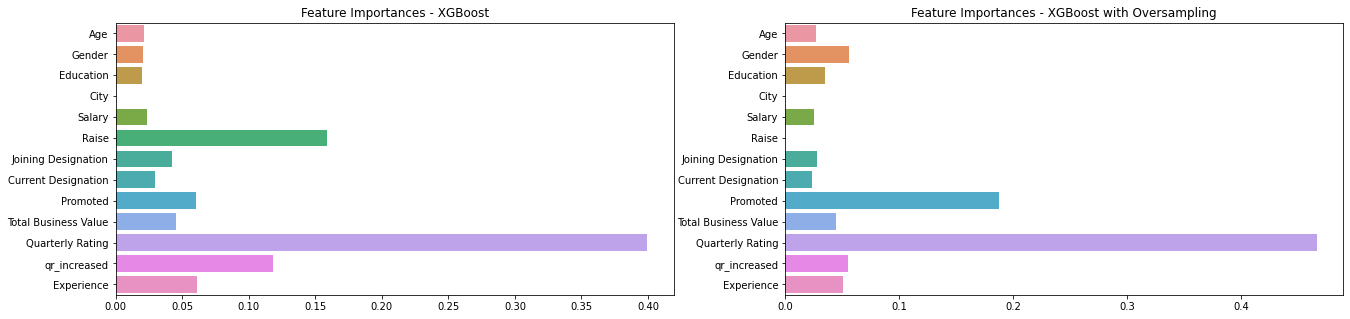

In [108]:
xgb_feat_imp = best_xgb_random.feature_importances_
xgb_feat_imp_ov = best_xgb_random_ov.feature_importances_

fig, ax = plt.subplots(1,2, figsize=(22, 5))

sns.barplot(y = list(X_train.columns), x = xgb_feat_imp, orient='h', ax=ax[0])
ax[0].set_title("Feature Importances - XGBoost")
sns.barplot(y = list(X_train.columns), x = xgb_feat_imp_ov, orient='h', ax=ax[1])
ax[1].set_title("Feature Importances - XGBoost with Oversampling")
plt.show()

#### Precision, Recall and F1 scores

We already saw that the F1 score on test data was higher for the base model without oversampling.
We will check the classification reports for the two models.

In [109]:
Y_test_pred = best_xgb_random.predict(X_test)
Y_test_pred_ov = best_xgb_random_ov.predict(X_test)
print("XgBoost model:")
print(classification_report(Y_test, Y_test_pred))
print("-"*60)
print("\nXgBoost model with oversampling :")
print(classification_report(Y_test, Y_test_pred_ov))

XgBoost model:
              precision    recall  f1-score   support

           0       0.79      0.66      0.72       158
           1       0.84      0.91      0.88       319

    accuracy                           0.83       477
   macro avg       0.82      0.79      0.80       477
weighted avg       0.83      0.83      0.82       477

------------------------------------------------------------

XgBoost model with oversampling :
              precision    recall  f1-score   support

           0       0.69      0.68      0.69       158
           1       0.84      0.85      0.85       319

    accuracy                           0.79       477
   macro avg       0.77      0.76      0.77       477
weighted avg       0.79      0.79      0.79       477



#### **<span style="color:#483D8B;">Observation: </span>**
- <strong>We look at the precision, recall and F1 scores for the '1' (attrited) class, since that is what we are trying to predict.</strong>

- <strong>So the base model has Precision, Recall and F1 score of 0.84, 0.91 and 0.87 respectively.</strong>
- <strong>And the model with oversampling has the values as 0.85, 0.85 and 0.85 respectively.</strong>

- <strong>So the precision is higher for the second model, but the recall and F1 score are better for the base xgboost model which used class weights as hyper parameters.</strong>

#### Accuracy and Confusion Matrices

In [110]:
print("Test accuracy for XGBoost -", accuracy_score(Y_test, Y_test_pred))
print("Test accuracy for XGBoost with oversampling -", accuracy_score(Y_test, Y_test_pred_ov))

Test accuracy for XGBoost - 0.8280922431865828
Test accuracy for XGBoost with oversampling - 0.7945492662473794


In [111]:
print("Confusion matrix format:")
print("   0   1")
print("   _____")
print("0 |__|__|")
print("1 |__|__|")
print("-"*60)

print("\nXGBoost model:")
print(confusion_matrix(Y_test, Y_test_pred))
print("-"*60)
print("\nXGBoost model with oversampling :")
print(confusion_matrix(Y_test, Y_test_pred_ov))

Confusion matrix format:
   0   1
   _____
0 |__|__|
1 |__|__|
------------------------------------------------------------

XGBoost model:
[[104  54]
 [ 28 291]]
------------------------------------------------------------

XGBoost model with oversampling :
[[107  51]
 [ 47 272]]


#### **<span style="color:#483D8B;">Observation: </span>**
- <strong>So once again we see that the base XGBoost seems to be performng better w.r.t prediction of positive class and also has better accuracy.</strong>

#### ROC Curves, Area under ROC Curves

[]

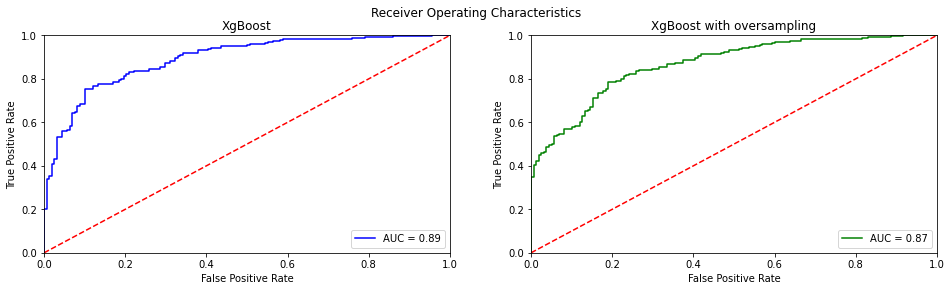

In [112]:
probs_y=best_xgb_random.predict_proba(X_test) 
precision, recall, thresholds = precision_recall_curve(Y_test, probs_y[:, 1]) 
probs_y_ov=best_xgb_random_ov.predict_proba(X_test) 
precision_ov, recall_ov, thresholds_ov = precision_recall_curve(Y_test, probs_y_ov[:, 1]) 


fpr, tpr, thresholds = roc_curve(Y_test, probs_y[:,1], drop_intermediate=False)
roc_auc = auc(fpr, tpr)
fpr_ov, tpr_ov, thresholds_ov = roc_curve(Y_test, probs_y_ov[:,1], drop_intermediate=False)
roc_auc_ov = auc(fpr_ov, tpr_ov)

fig, ax = plt.subplots(1,2, figsize=(16,4))

plt.suptitle('Receiver Operating Characteristics')

ax[0].plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
ax[0].legend(loc = 'lower right')
ax[0].plot([0, 1], [0, 1],'r--')
ax[0].set_xlim([0, 1])
ax[0].set_ylim([0, 1])
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_title("XgBoost")

ax[1].plot(fpr_ov, tpr_ov, 'g', label = 'AUC = %0.2f' % roc_auc_ov)
ax[1].legend(loc = 'lower right')
ax[1].plot([0, 1], [0, 1],'r--')
ax[1].set_xlim([0, 1])
ax[1].set_ylim([0, 1])
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_title("XgBoost with oversampling")

plt.plot()

#### **<span style="color:#483D8B;">Observation: </span>**
- <strong> So the AUC of the original XGBoost model is better than the AUC of the model trained on oversampled data.</strong>

<strong>So from Section 2, the best model seems to be : <mark>best_xgb_random</mark> </strong>
#### 

<a id = "ten"></a>
<h1 id="basics" style="background:black; padding: 10px 0; border:#FFC300; border-width:5px; border-radius: 10px; border-style:solid; font-family:MV Boli; color:white; line-height: 10px;"> 
    <center> ◽ Random Forest Classifier ◽
    </center>
</h1>

#### 
### 3. Random Forest 

 - We will again use 5 fold Cross Validation.
 - We will use Stratified K-Fold.
 - We will use GridSearch to tune the hyperparameters.
 - We will treat class imbalance by treating class weights as hyperparameters.
 - We will consider maximum tree depth, row sampling and number of parallel trees as the other hyperparameters.

In [113]:


class_wts = [{ 0:1, 1:scale_pos_w },'balanced']
#hyper parameters for grid search
params = {
        'class_weight': class_wts,
        'max_samples': [0.6, 0.8],
        'max_depth': [5, 10, 15],
        'n_estimators':[300, 500]
        }

#RF classifier
rf = RandomForestClassifier(random_state=1001)

folds = 5
#Stratified k-folds
skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state = 1001)

#model with grid search for hyperparameter tuning
grid_search_rf = GridSearchCV(rf, params, scoring='f1', n_jobs=4, cv=skf.split(X_train,Y_train))

start = dt.datetime.now()
grid_search_rf.fit(X_train, Y_train)
end = dt.datetime.now()

#### Best Random Forest Model obtained using Grid Search

In [114]:
print('\n Best hyperparameters:')
print(grid_search_rf.best_params_)
grid_best_rf = grid_search_rf.best_params_


 Best hyperparameters:
{'class_weight': 'balanced', 'max_depth': 10, 'max_samples': 0.8, 'n_estimators': 300}


In [115]:
max_samples = grid_best_rf['max_samples']
max_depth = grid_best_rf['max_depth']
n_estimators = grid_best_rf['n_estimators']
class_weight = grid_best_rf['class_weight']

best_rf = RandomForestClassifier(random_state=1001, max_samples=max_samples, max_depth=max_depth, 
                                n_estimators=n_estimators, class_weight=class_weight)
best_rf.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_samples=0.8,
                       n_estimators=300, random_state=1001)

In [116]:
print(f"Time taken for training : {end - start}\nTraining F1 score:{best_rf.score(X_train, Y_train)}\nTest F1 score: {best_rf.score(X_test, Y_test)}")

Time taken for training : 0:00:52.159045
Training F1 score:0.9338235294117647
Test F1 score: 0.8071278825995807


#### **<span style="color:#483D8B;">Observation: </span>**
- <strong>So our random forest model seems to be performing worse than the XGBoost model in terms of the F1 score of the attrited class, on test data. </strong>

<a id = "eleven"></a>
<h1 id="basics" style="background:black; padding: 10px 0; border:#FFC300; border-width:5px; border-radius: 10px; border-style:solid; font-family:MV Boli; color:white; line-height: 10px;"> 
    <center> ◽ Comparison of Different Models ◽
    </center>
</h1>

#### 

### Comparing the simple decision tree, random forest and gradient boosted decision trees models.

#### 1. Feature Importances

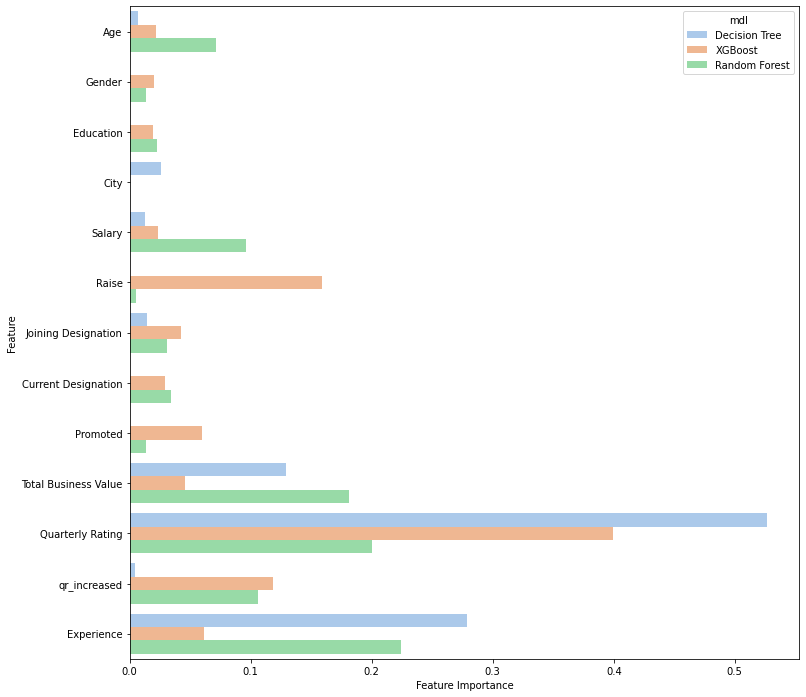

In [117]:
dt_feat_imp = model1.feature_importances_
xgb_feat_imp = best_xgb_random.feature_importances_
rf_feat_imp = best_rf.feature_importances_

df_dt = pd.DataFrame()
df_dt['data'] = dt_feat_imp
df_dt['mdl'] = ['Decision Tree' for _ in range(len(dt_feat_imp))]
df_xgb = pd.DataFrame()
df_xgb['data'] = xgb_feat_imp
df_xgb['mdl'] = ['XGBoost' for _ in range(len(xgb_feat_imp))]
df_rf = pd.DataFrame()
df_rf['data'] = rf_feat_imp
df_rf['mdl'] = ['Random Forest' for _ in range(len(rf_feat_imp))]
final = df_dt.append(df_xgb.append(df_rf))
final["col"] = list(X_train.columns)*3

plt.figure(figsize=(12,12))
sns.barplot(y=final['col'], x=final['data'], hue=final['mdl'], orient='h')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

#### **<span style="color:#483D8B;">Observation: </span>**
- We can see that the feature 'Quarterly Rating' seems to be very important for the Decision Tree and XGBoost models.

- For Random Forest, Experience seems to be the most important feature, followed by Quarterly Rating. Experience is also important for Decision Tree Model. But it's importance is quite low for the XGBoost model. We observe something similar for the Total Business Value feature.

- The features Age and Income are important for Random Forest, but not so much for Decision Tree or XGBoost.

#### 
#### 2. Precision, Recall and F1 scores

In [118]:
Y_test_pred_dt = model1.predict(X_test)
Y_test_pred_xgb = best_xgb_random.predict(X_test)
Y_test_pred_rf = best_rf.predict(X_test)

print("Decision Tree model:")
print(classification_report(Y_test, Y_test_pred_dt))
print("-"*60)
print("\nXgBoost model:")
print(classification_report(Y_test, Y_test_pred_xgb))
print("-"*60)
print("\nRandom Forest:")
print(classification_report(Y_test, Y_test_pred_rf))

Decision Tree model:
              precision    recall  f1-score   support

           0       0.77      0.58      0.66       158
           1       0.82      0.92      0.86       319

    accuracy                           0.81       477
   macro avg       0.79      0.75      0.76       477
weighted avg       0.80      0.81      0.80       477

------------------------------------------------------------

XgBoost model:
              precision    recall  f1-score   support

           0       0.79      0.66      0.72       158
           1       0.84      0.91      0.88       319

    accuracy                           0.83       477
   macro avg       0.82      0.79      0.80       477
weighted avg       0.83      0.83      0.82       477

------------------------------------------------------------

Random Forest:
              precision    recall  f1-score   support

           0       0.75      0.63      0.68       158
           1       0.83      0.90      0.86       319

    acc

#### **<span style="color:#483D8B;">Observation: </span>**
- <strong>The <mark>XGBoost</mark> model has the highest <mark>precision</mark>. It's recall is one percent lower than the Decision Tree Model. However, we get the best F1 score for the XGBoost model. </strong>
- <strong>The <mark>F1 score</mark> for <mark>XGBoost model</mark> is <mark>0.87</mark>, while for the other two models it is 0.86.</strong>

- <strong>If we look at <mark>weighted F1 score</mark>, then <mark>XGBoost</mark> appears to be the clear winner with a score of <mark>0.82</mark>, whereas the score for the Decision Tree model is 0.8 and for the Random Forest model, is 0.81.</strong>

#### 
#### 3. Accuracy and Confusion Matrices

In [119]:
print("Test accuracy for Decision Tree -", accuracy_score(Y_test, Y_test_pred_dt))
print("Test accuracy for XGBoost -", accuracy_score(Y_test, Y_test_pred_xgb))
print("Test accuracy for Random Forest -", accuracy_score(Y_test, Y_test_pred_rf))

Test accuracy for Decision Tree - 0.8050314465408805
Test accuracy for XGBoost - 0.8280922431865828
Test accuracy for Random Forest - 0.8071278825995807


In [120]:
print("Confusion matrix format:")
print("   0   1")
print("   _____")
print("0 |__|__|")
print("1 |__|__|")
print("-"*60)

print("\nDecision Tree:")
print(confusion_matrix(Y_test, Y_test_pred_dt))
print("-"*60)
print("\nXGBoost model:")
print(confusion_matrix(Y_test, Y_test_pred_xgb))
print("-"*60)
print("\nRandom Forest:")
print(confusion_matrix(Y_test, Y_test_pred_rf))

Confusion matrix format:
   0   1
   _____
0 |__|__|
1 |__|__|
------------------------------------------------------------

Decision Tree:
[[ 92  66]
 [ 27 292]]
------------------------------------------------------------

XGBoost model:
[[104  54]
 [ 28 291]]
------------------------------------------------------------

Random Forest:
[[ 99  59]
 [ 33 286]]


#### **<span style="color:#483D8B;">Observation: </span>**
- <strong>In terms of accuracy again, the <mark>XGBoost</mark> model has highest score of <mark>0.82</mark>, while the other models have around 0.80.</strong>

- <strong>If we look at the confusion matrix, again the <mark>XGBoost</mark> model seems to be performing <mark>reasonably well</mark> in terms of reducing misclassifications of both the positive and negative classes. </strong>

- <strong>Decision tree achieves only marginally better performance for positive class, but misclassifies a lot of negative class observations. Random forest does better on negative class than decision tree, but make it worse for the positive class. So the <mark>XGBoost</mark> model provides a balance between the two. </strong>

#### 
#### 4. ROC Curves, Area under ROC Curves

[]

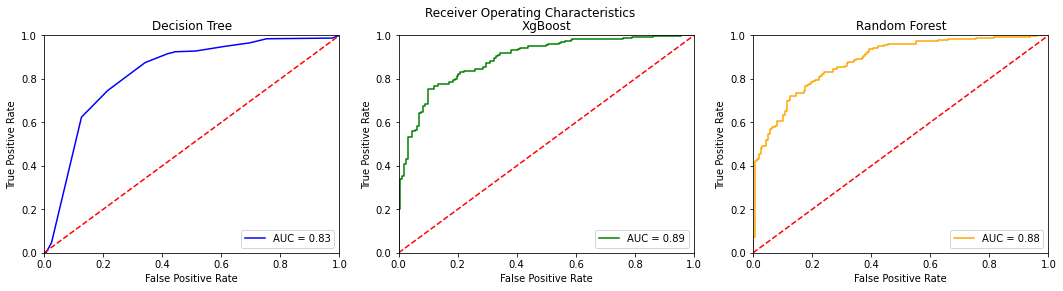

In [121]:
probs_y_dt=model1.predict_proba(X_test) 
precision_dt, recall_dt, thresholds_dt = precision_recall_curve(Y_test, probs_y_dt[:, 1]) 
probs_y_xgb=best_xgb_random.predict_proba(X_test) 
precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(Y_test, probs_y_xgb[:, 1]) 
probs_y_rf = best_rf.predict_proba(X_test)
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(Y_test, probs_y_rf[:, 1]) 


fpr_dt, tpr_dt, thresholds_dt = roc_curve(Y_test, probs_y_dt[:,1], drop_intermediate=False)
roc_auc_dt = auc(fpr_dt, tpr_dt)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(Y_test, probs_y_xgb[:,1], drop_intermediate=False)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, probs_y_rf[:,1], drop_intermediate=False)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fig, ax = plt.subplots(1,3, figsize=(18,4))

plt.suptitle('Receiver Operating Characteristics')

ax[0].plot(fpr_dt, tpr_dt, 'b', label = 'AUC = %0.2f' % roc_auc_dt)
ax[0].legend(loc = 'lower right')
ax[0].plot([0, 1], [0, 1],'r--')
ax[0].set_xlim([0, 1])
ax[0].set_ylim([0, 1])
ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_title("Decision Tree")

ax[1].plot(fpr_xgb, tpr_xgb, 'g', label = 'AUC = %0.2f' % roc_auc_xgb)
ax[1].legend(loc = 'lower right')
ax[1].plot([0, 1], [0, 1],'r--')
ax[1].set_xlim([0, 1])
ax[1].set_ylim([0, 1])
ax[1].set_ylabel('True Positive Rate')
ax[1].set_xlabel('False Positive Rate')
ax[1].set_title("XgBoost")

ax[2].plot(fpr_rf, tpr_rf, 'orange', label = 'AUC = %0.2f' % roc_auc_rf)
ax[2].legend(loc = 'lower right')
ax[2].plot([0, 1], [0, 1],'r--')
ax[2].set_xlim([0, 1])
ax[2].set_ylim([0, 1])
ax[2].set_ylabel('True Positive Rate')
ax[2].set_xlabel('False Positive Rate')
ax[2].set_title("Random Forest")

plt.plot()

#### **<span style="color:#483D8B;">Observation: </span>**
- The AUC for both XGBoost and Random Forests seems to be same (0.88) while for the decision tree it is 0.82.

<a id = "twelve"></a>
<h1 id="basics" style="background:black; padding: 10px 0; border:#FFC300; border-width:5px; border-radius: 10px; border-style:solid; font-family:MV Boli; color:white; line-height: 10px;"> 
    <center> ◽ Insights obtained using Exploratory Data Analysis ◽
    </center>
</h1>

#### 
### Insights from EDA

- Almost 67.8 % of the employees have left the organization. 
- The median age of the employees is 33. There are employees as young as 21 years and as old as 58 years.
- The median income is about 55K. It can range from 10K all the way to 188K.
- The median business value generated is 817K.
- The median experience is between 5 to 6 months. 
- We see that there are 59% male employees and 41% female employees.
- The percentages of employees with different education levels are almost equal (~33%).
- 98.2% of the employees did not receive any income increment. Only 1.8% received a raise.
- Almost 43% of the employees joined at lowest designation (1). 34% joined at level 2, 20% at level 3 and below 2% joined at higher levels.
- Majority (35%) of the employees currently are at designation level 2, followed by designation level 1 (31%) and 3 (26%). Less than 6% of the employees are currently in higher designations.
- Only 17% of the employees received a promotion, while 83% did not. However, we saw that only 1.8% received a raise in income. So it seems like these people are getting ahead in their grade without receiving the financial compensation. This might lead to dissatisfaction. 
- Quarterly Rating is lowest (1) for the majority of employees (73%). Very few received rating over 3 (11.5%).
- Quarterly rating increased for only 15% of employees. It reduced for 19% of the employees and remained unchanged for 65%.
- The majority of the employees seem to be associated with city C20.
- The median age for attrited employees is 33, while for non attrited employees it is 34.
- The median income of atrited employyes is lower (\~51K) than non attrited employees (\~64K).
- The median total business value generated by attrited employees (\~46K) is almost 1/6 of the non attrited employees (\~263K)
- The median experience for attrited employees is about 165 days and for non attrited employees it is 186 days.
- The attrition rate of male and female employees is similar (\~67-68%).
- The attrition rate across different education levels is also similar (from 66-69%).
- The attrition among those who received raise (7%) is far lower than those who did not receive raise (68%).
- The atrition is highest among those whose current designation is 1 (80%) followed by 2 (70%). The rate is around 50-54% for the remaining designation.
- The attrition rate is 70% for those who were not promoted and 54% for those who were promoted.
- The attrtion rate follows a clear declinig pattern with increasing quarterly rating : 1 (82%), 2 (40%), 3 (16%) and 4 (9%).
- The attrtion rate is highest among those whose quarterly rating decreased (81%), followed by those whose rating remained unchanged (74%) and finally those whose rating increased (23%).
- There is mopderate correlation between the Total Business Value and Experience features, which is somewhat expected, since the longer a person works, the more likely it is for him to generate positive business value and higher the sum of monthly business values.
- There is moderate correlation between Current Designation and Income which is expected since the higher the designation, the greater the income.
- Also, there is moderate correlation between the current designation and joining designation.
- Again, there is moderate correlation between Experience and Promotion (the longer a person has been working, the higher the chance of getting promoted.

<a id = "thirteen"></a>
<h1 id="basics" style="background:black; padding: 10px 0; border:#FFC300; border-width:5px; border-radius: 10px; border-style:solid; font-family:MV Boli; color:white; line-height: 10px;"> 
    <center> ◽ Discussion on Trade Off and Possible Recommendations ◽
    </center>
</h1>

#### 
#### The Trade-Off

In general while choosing a model, we might choose to look at precision and recall scores and choose while keeping the following trade-off on mind :
- If we prioritize precision, we are going to reduce our false positives. This may be useful if our targeted retention strategies prove to be expensive. We don't want to spend unnecessarily on somebody who is not even going to leave in the first place. Also, it might lead to uncomfortable situation for the employee themselves if they are put in a situation where it is assumed that they are going to be let go/ going to leave.

- If we prioritize recall, we are going to reduce our false negatives. This is useful since usually the cost of hiring a new person is higher than retaining an experienced person. So, by reducing false negatives, we would be able to better identify those who are actually going to leave and try to retain them by appropriate measures (competitive remuneration, engagement program, etc). 

### Recommendations 

- We saw that the percentage of employees who received a raise was only 1.8%, whereas 17% of the employees received a promotion. It appears that promotion does not guarantee an increase in compensation. Employees may not be motivated to continue working for an organization if they feel that they are undervalued in terms of financial compensation. This is further substantiated by the fact that attrition rate among promoted employees was 54%, which was a lot higher than the attrition rate of employees who received a raise (7%). So it is better if promotion also leads to increase in compensation.

- We saw that quarterly rating is an important indicator of whether the employee might leave voluntarily/involuntarily. A lot of employees have the lowest quarterly rating and the attrition among them is high. The organization might look into improvement programs for underperforming employees before they are let go, or before they resign. Also, improvement in rating can be rewarded to encourage better performance. 

- Salaries must be competitve to prevent losing employees to attrition and to competition and since almost 68% of employees attrited in a small span, it seems that correction of payscales is necessary for the organization since hiring new employees is costlier than retaining old ones.

- Specific employee engagement programs can also be introduced targeting the different categories of performers to help them achieve their goals as well as help them increase their contribution towards the business value. The hiring process can also be restructured since a lot of new hires seem to be leaving (median experience is lower for attrited employees).

### Thank You for Reading! 